In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
try:
    df = pd.read_csv("M25_DA_A1_Dataset1.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found.")
    df = None

if df is not None:
    print("--- Initial Data Info ---")
    df.info()
    print("\n--- First 5 Rows ---")
    print(df.head())
    print(f"\nInitial dataset shape: {df.shape}")

Dataset loaded successfully.
--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48843 non-null  object 
 1   Workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Education_Num   48842 non-null  float64
 5   Martial_Status  48842 non-null  object 
 6   Occupation      46033 non-null  object 
 7   Relationship    48842 non-null  object 
 8   Race            48842 non-null  object 
 9   Sex             48842 non-null  object 
 10  Capital_Gain    48842 non-null  float64
 11  Capital_Loss    48842 non-null  float64
 12  Hours_per_week  48842 non-null  float64
 13  Country         47985 non-null  object 
 14  Target          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB

--- First 5 Rows 

1. The `Age` column is listed as an `object` instead of a number.
2. The `RangeIndex` has 48843 entries, but some columns have 48842 non-null values, one row is almost empty and should be removed.
3. `Workclass`, `Occupation`, and `Country` have missing values.

In [3]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
print("Converted 'Age' column to numeric.")

# Drop rows where 'Age' is NaN
initial_rows = len(df)
df.dropna(subset=['Age'], inplace=True)
rows_dropped = initial_rows - len(df)
print(f"Dropped {rows_dropped} rows due to NaN values in 'Age'.")

# Convert columns to integer type to save memory
for col in [
    'Age', 'fnlwgt', 'Education_Num', 'Capital_Gain',
    'Capital_Loss', 'Hours_per_week'
]:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype(int)
    print(f"Converted '{col}' column to integer type.")

print("\n--- Data Info After Type Correction ---")
df.info()

Converted 'Age' column to numeric.
Dropped 1 rows due to NaN values in 'Age'.
Converted 'Age' column to integer type.
Converted 'fnlwgt' column to integer type.
Converted 'Education_Num' column to integer type.
Converted 'Capital_Gain' column to integer type.
Converted 'Capital_Loss' column to integer type.
Converted 'Hours_per_week' column to integer type.

--- Data Info After Type Correction ---
<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education_Num   48842 non-null  int64 
 5   Martial_Status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex   

- When we dropped a row, pandas changed the index from `RangeIndex` which is highly memory efficient to a standard `Index` which stores all 48842 row numbers, thats why the memory usage increased.
- There are 10 more cases of missing `Occupation` values where `Workclass` is present.
- Next step is fix data inconsistencies like the `Target` column and trim whitespaces from all other text-based columns.

In [4]:
# --- Step 3: Clean Inconsistent Categorical Data ---

print("--- Cleaning 'Target' Column ---")
# Display unique values before cleaning to see the issue
# We need to handle potential None values if the column has them, though it shouldn't at this stage
if 'Target' in df.columns:
    print("Unique values before cleaning:", df['Target'].unique())

    # Chain string methods to strip whitespace and remove trailing periods
    df['Target'] = df['Target'].str.strip().str.rstrip('.')

    # Display unique values after cleaning to confirm the fix
    print("Unique values after cleaning:", df['Target'].unique())

# It's also good practice to strip whitespace from all object columns
print("\n--- Stripping Whitespace from All Object Columns ---")
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()
print("Whitespace stripped from all object columns.")

--- Cleaning 'Target' Column ---
Unique values before cleaning: [' <=50K' ' >50K' ' <=50K.' ' >50K.']
Unique values after cleaning: ['<=50K' '>50K']

--- Stripping Whitespace from All Object Columns ---
Whitespace stripped from all object columns.


- Next step is to handle the missing values in `Workclass`, `Occupation`, and `Country` columns.

--- Visualizing Missing Value Correlations ---


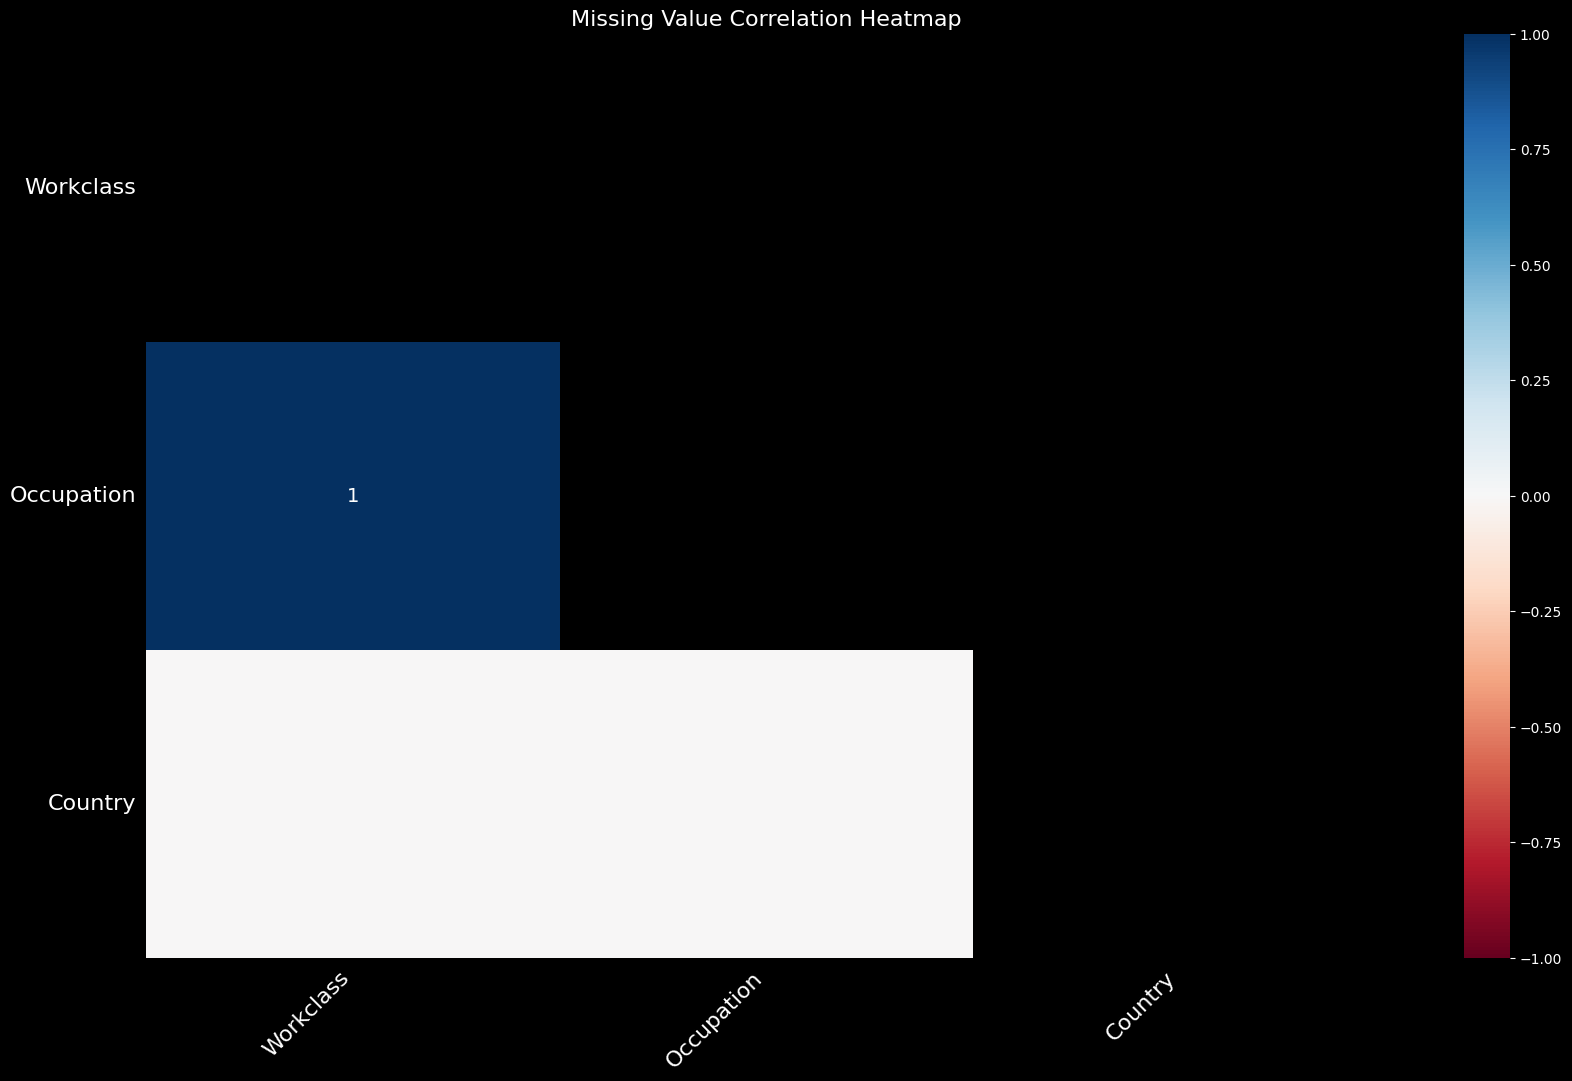


--- Analyzing Distributions for Missing Data ---


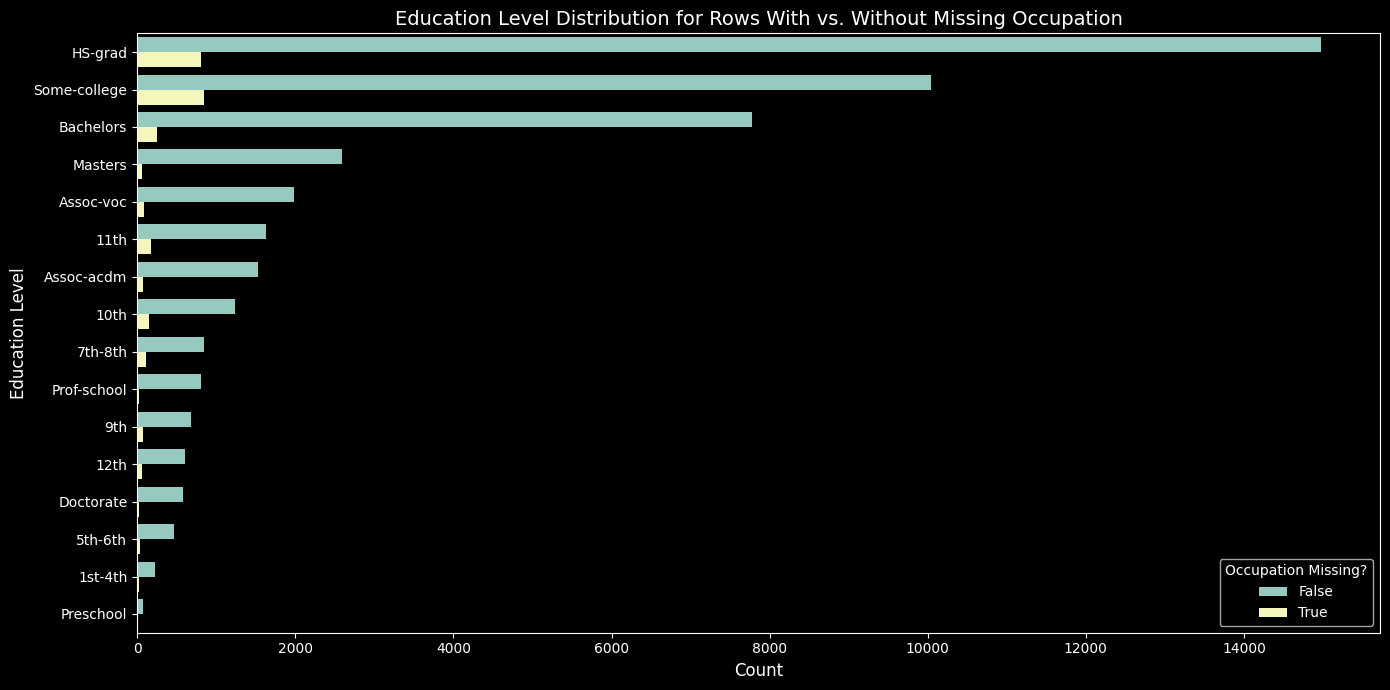

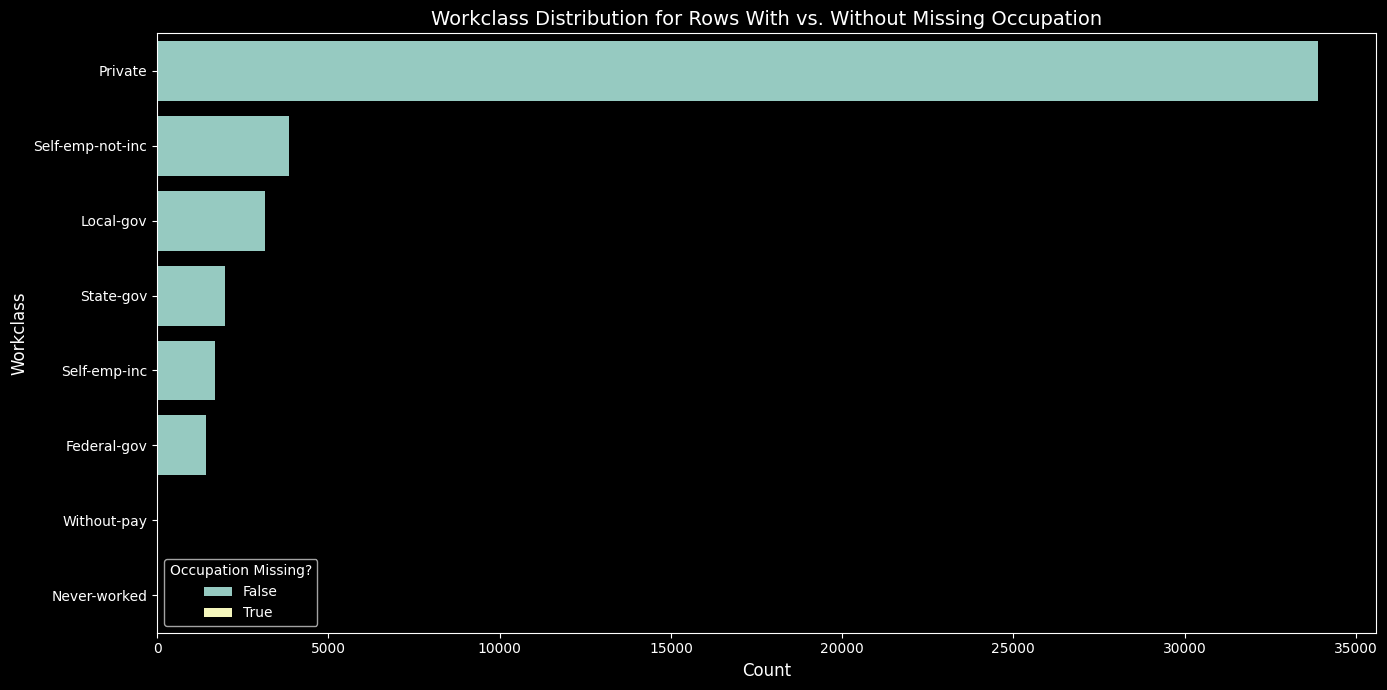

In [5]:
print("--- Visualizing Missing Value Correlations ---")

# 1. Missing Value Heatmap
# This shows the correlation of missingness between columns.
# A value of 1 means if a value is missing in one column, it's also missing in the other.
# A value of -1 means if a value is present in one, it's missing in the other.
msno.heatmap(df)
plt.title('Missing Value Correlation Heatmap', fontsize=16)
plt.show()

# 2. Comparative Bar Charts
# This is more intuitive for seeing how distributions change.
print("\n--- Analyzing Distributions for Missing Data ---")

# Create a temporary copy to analyze missingness without altering the original df yet
df_missing_analysis = df.copy()
df_missing_analysis['Occupation_is_missing'] = df_missing_analysis['Occupation'].isnull()
df_missing_analysis['Workclass_is_missing'] = df_missing_analysis['Workclass'].isnull()

# Plot 1: How does the distribution of 'Education' differ for missing 'Occupation'?
plt.figure(figsize=(14, 7))
sns.countplot(data=df_missing_analysis, y='Education', hue='Occupation_is_missing', order=df['Education'].value_counts().index)
plt.title("Education Level Distribution for Rows With vs. Without Missing Occupation", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Education Level", fontsize=12)
plt.legend(title='Occupation Missing?')
plt.tight_layout()
plt.show()

# Plot 2: How does the distribution of 'Workclass' differ for missing 'Occupation'?
plt.figure(figsize=(14, 7))
sns.countplot(data=df_missing_analysis, y='Workclass', hue='Occupation_is_missing', order=df['Workclass'].value_counts().index)
plt.title("Workclass Distribution for Rows With vs. Without Missing Occupation", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Workclass", fontsize=12)
plt.legend(title='Occupation Missing?')
plt.tight_layout()
plt.show()

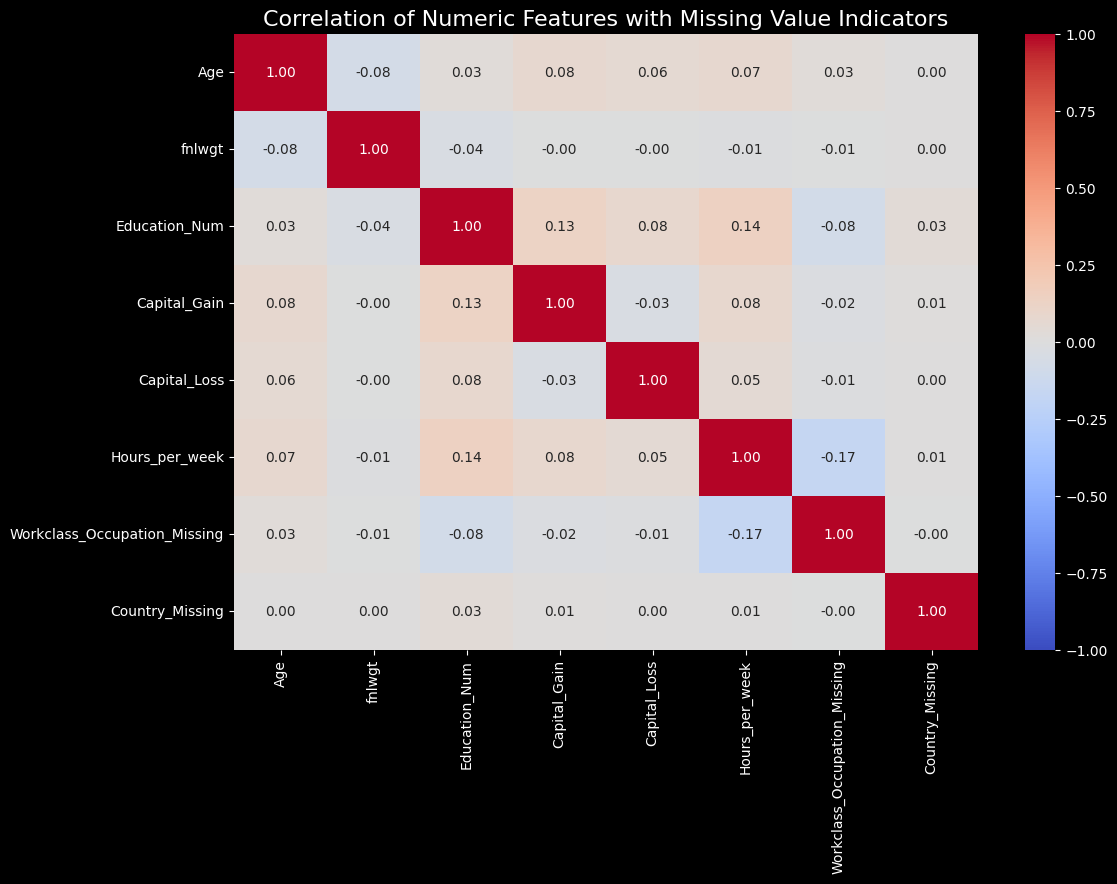

In [6]:
# --- Step 5: Correlating Missingness with Numeric Features ---

# Create a temporary DataFrame for this analysis
df_corr_analysis = df.copy()

# Create binary flags for missing values
df_corr_analysis['Workclass_Occupation_Missing'] = df_corr_analysis['Workclass'].isnull(
).astype(int)
df_corr_analysis['Country_Missing'] = df_corr_analysis['Country'].isnull(
).astype(int)

# Select only the numeric columns and the new missing flags
numeric_cols_with_flags = [
    'Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
    'Hours_per_week', 'Workclass_Occupation_Missing', 'Country_Missing'
]
df_numeric_corr = df_corr_analysis[numeric_cols_with_flags]

# Calculate the correlation matrix
corr_matrix = df_numeric_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title(
    'Correlation of Numeric Features with Missing Value Indicators', fontsize=16)
plt.show()

- **Workclass and Occupation are missing together:** The missing value correlation heatmap shows a perfect correlation of 1 between `Workclass` and `Occupation`, indicating that when one is missing, the other is also likely to be missing. This means that, when `Workclass` is missing, `Occupation` is always missing. There are also 10 additional cases where `Occupation` is missing, but `Workclass` is present.
- **The group with missing Workclass/Occupation is fundamentally different from the rest of the dataset:** The education level distribution plot shows a different pattern of education for rows where Occupation is missing (yellow) versus where it is not (blue). Also the correlation of numeric features shows a negative correlation between `Workclass_Occupation_Missing` and `Hours_per_week`, meaning people in this group work fewer hours.
- **Missingness in Country column is independent:** `Country_Missing` has close to 0 correlation with all other features and can be safely replaced by mode.

In [7]:
# --- Step 6: Impute Missing Values Based on Analysis ---

print("--- Handling Missing Values ---")

# For Workclass and Occupation, where missingness is a distinct category,
# fill with a new 'Unknown' category.
df['Workclass'].fillna('Unknown')
df['Occupation'].fillna('Unknown')
print("Filled missing 'Workclass' and 'Occupation' with 'Unknown'.")

# For Country, where missingness is sparse and less patterned,
# fill with the mode (most frequent value).
country_mode = df['Country'].mode()[0]
df['Country'].fillna(country_mode)
print(f"Filled missing 'Country' with mode: '{country_mode}'.")

# --- Final Verification ---
print("\n--- Verifying All Missing Values are Handled ---")
# The .info() method will now show 0 nulls for all columns.
df.info()

--- Handling Missing Values ---
Filled missing 'Workclass' and 'Occupation' with 'Unknown'.
Filled missing 'Country' with mode: 'United-States'.

--- Verifying All Missing Values are Handled ---
<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education_Num   48842 non-null  int64 
 5   Martial_Status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital_Gain    48842 non-null  int64 
 11  Capital_Loss    48842 non-null  int64 
 12  Hours_per_week  48842 non-null  int64 
 13  Country         47985 non-null  obje

# EDA

Starting Structured EDA...

--- PART 1: UNIVARIATE ANALYSIS ---

Analyzing Numerical Feature Distributions...


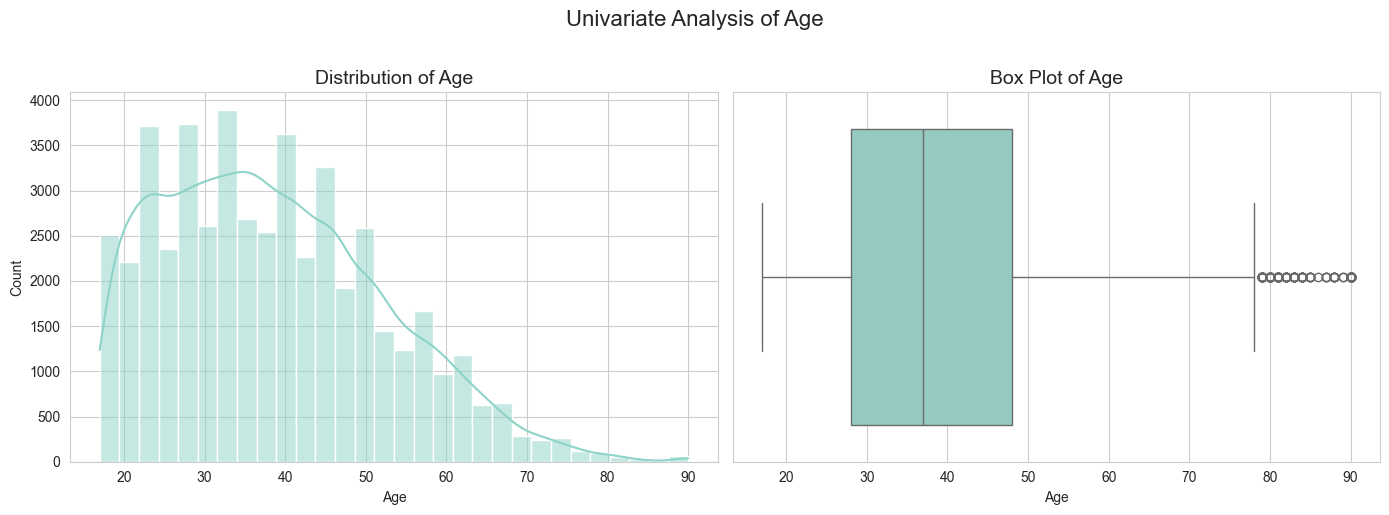

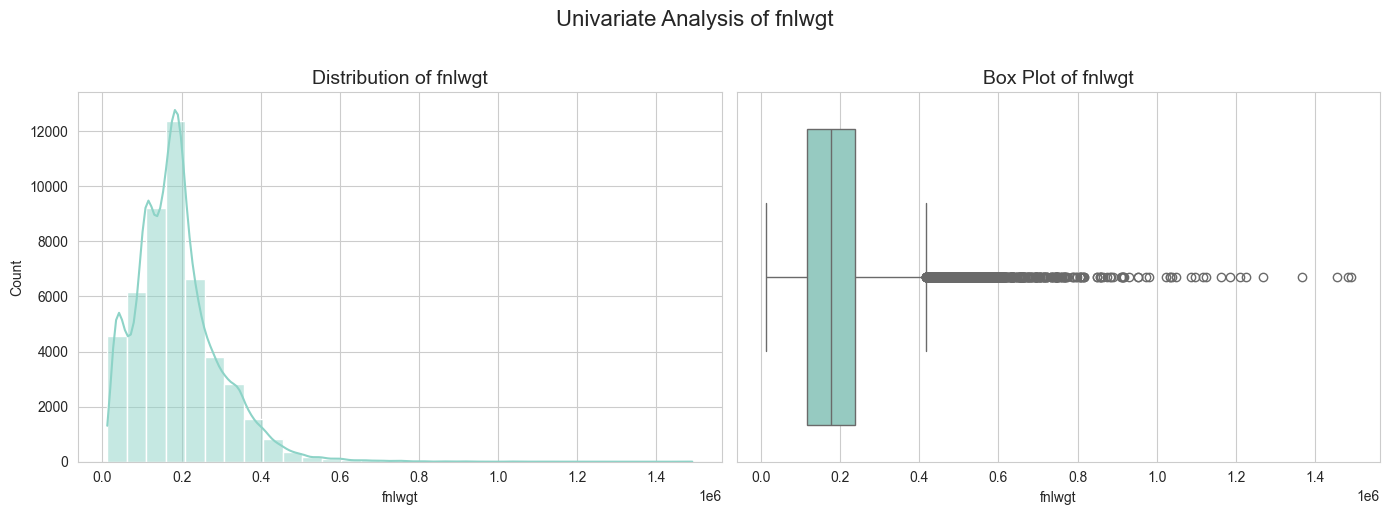

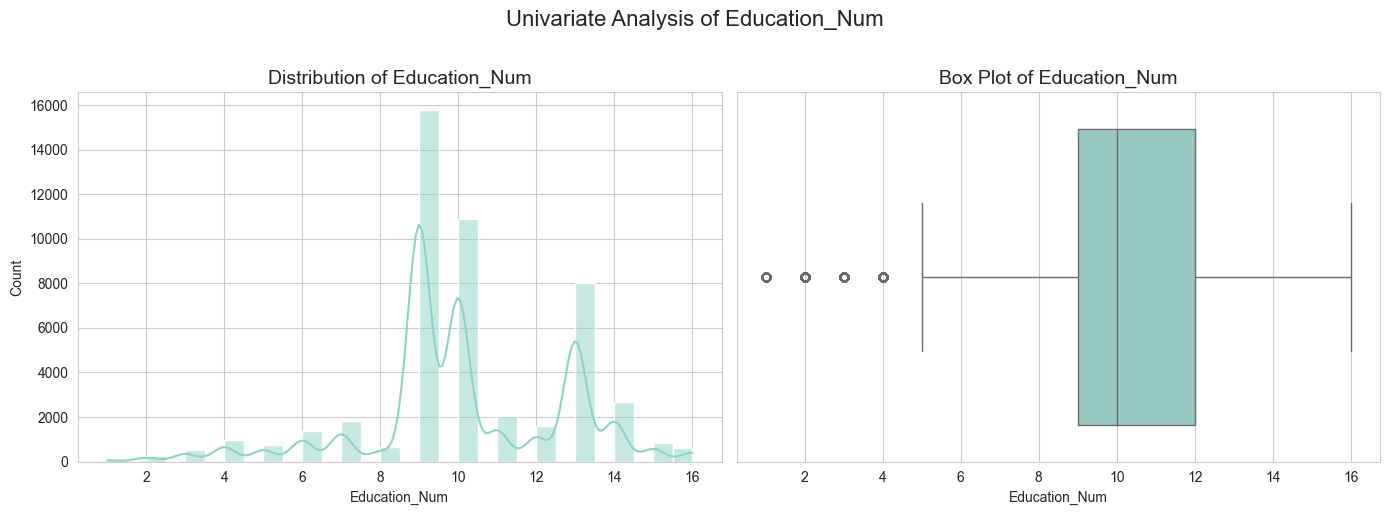

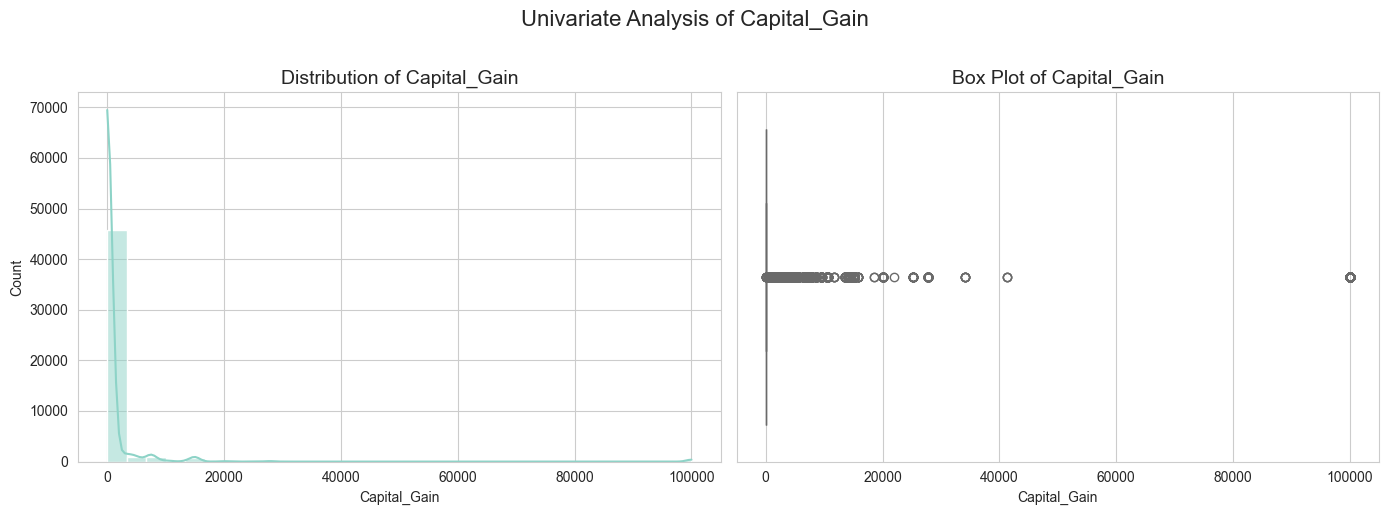

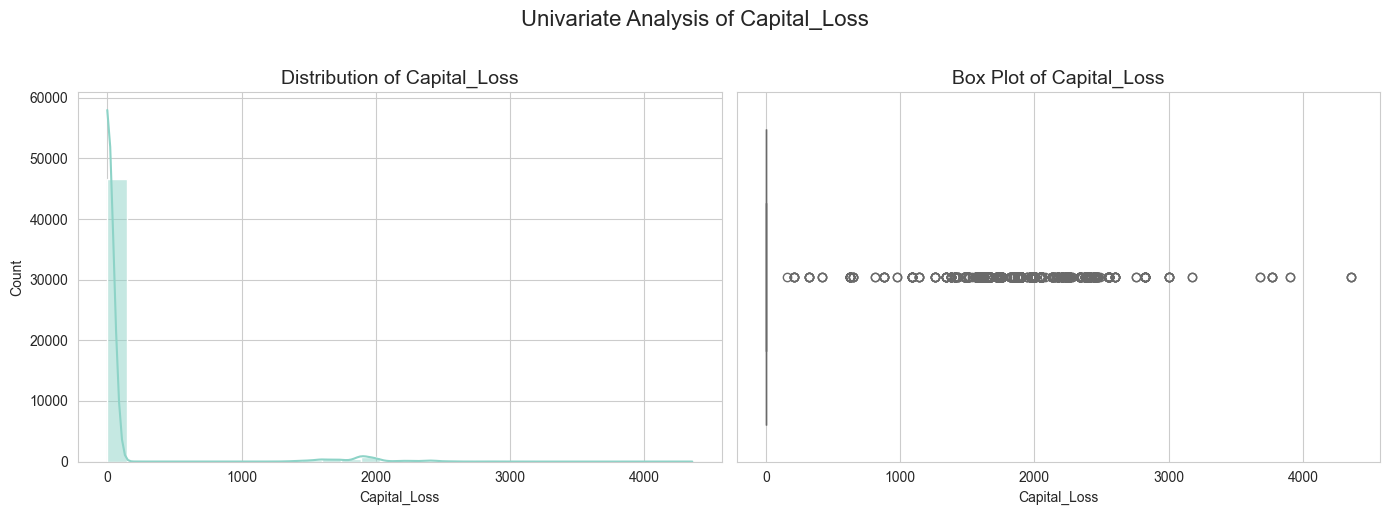

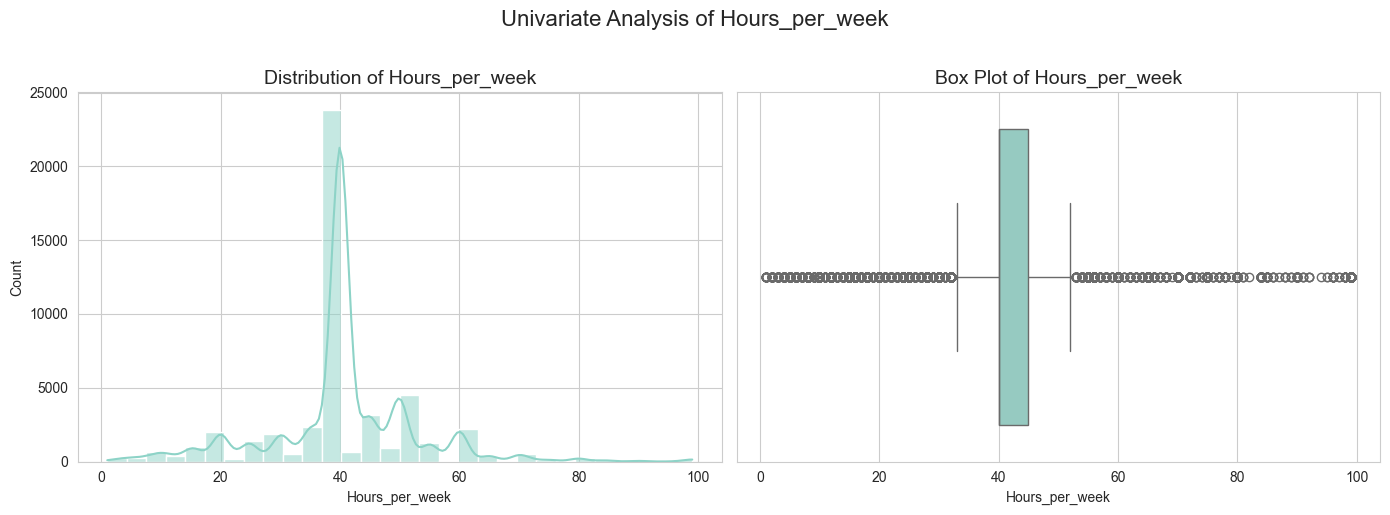


Analyzing Categorical Feature Distributions...


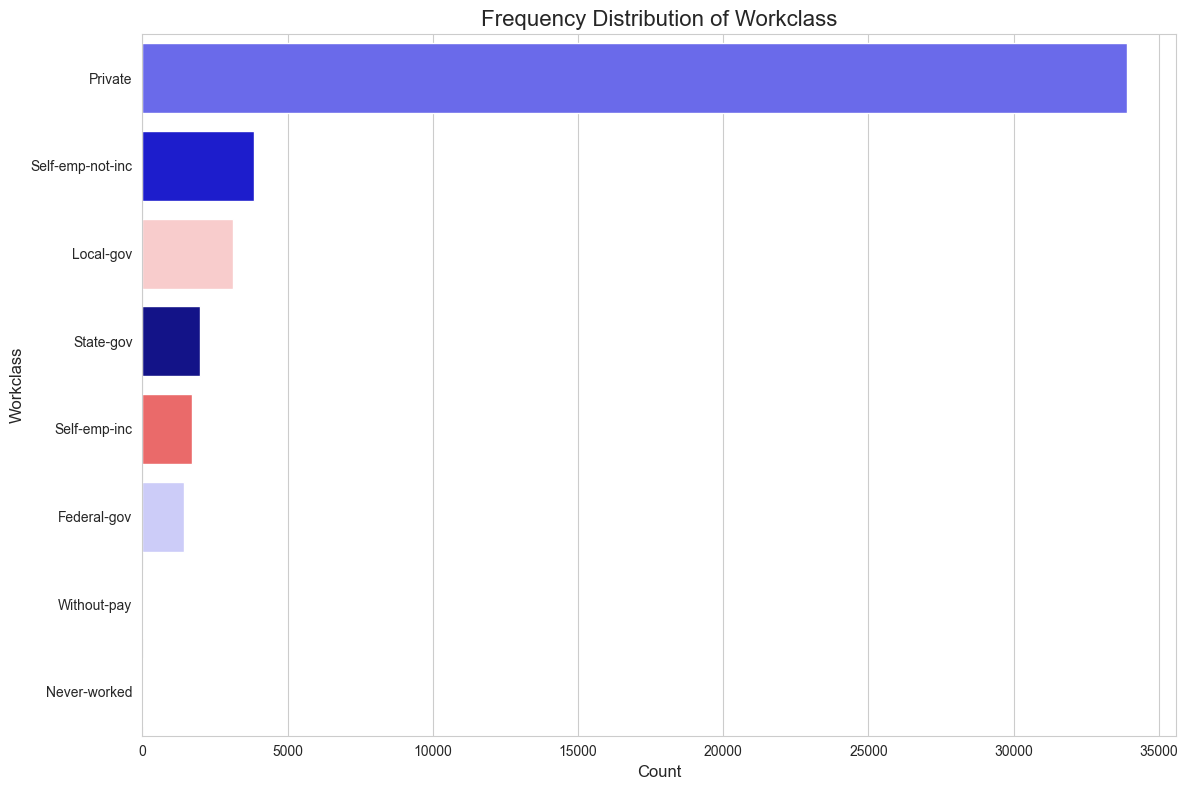

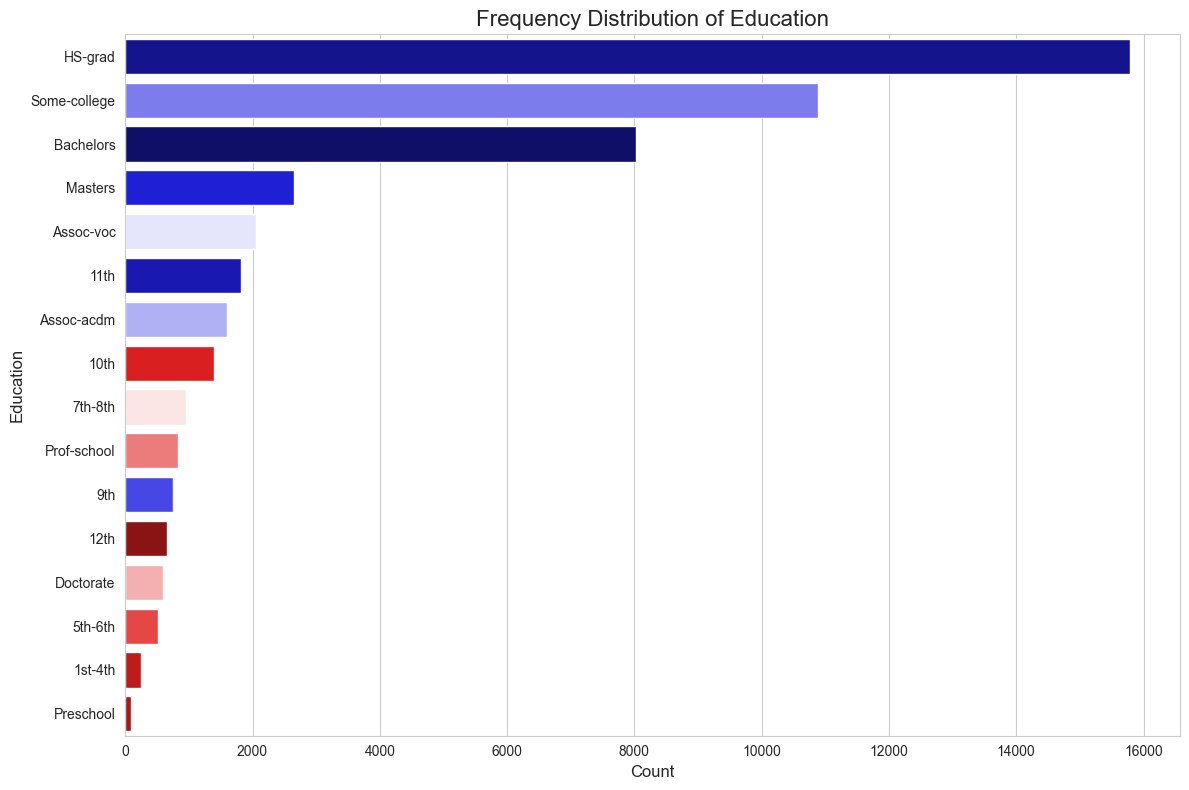

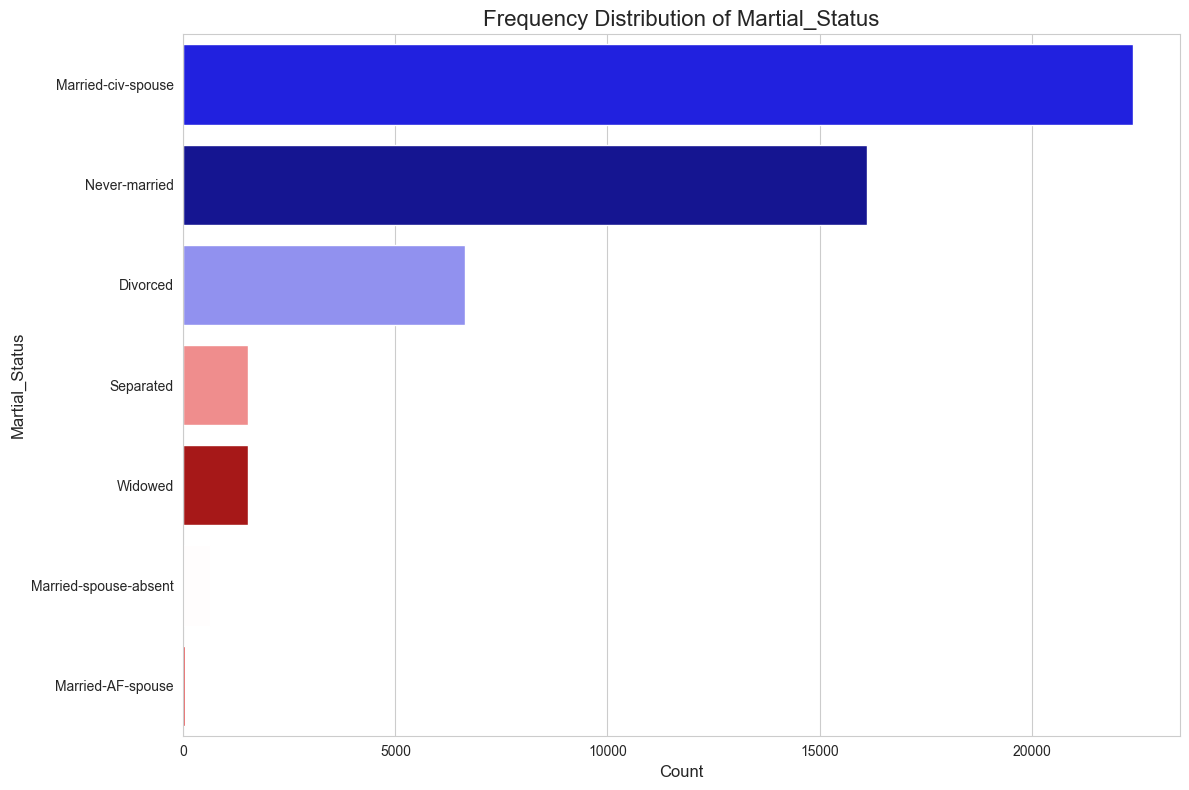

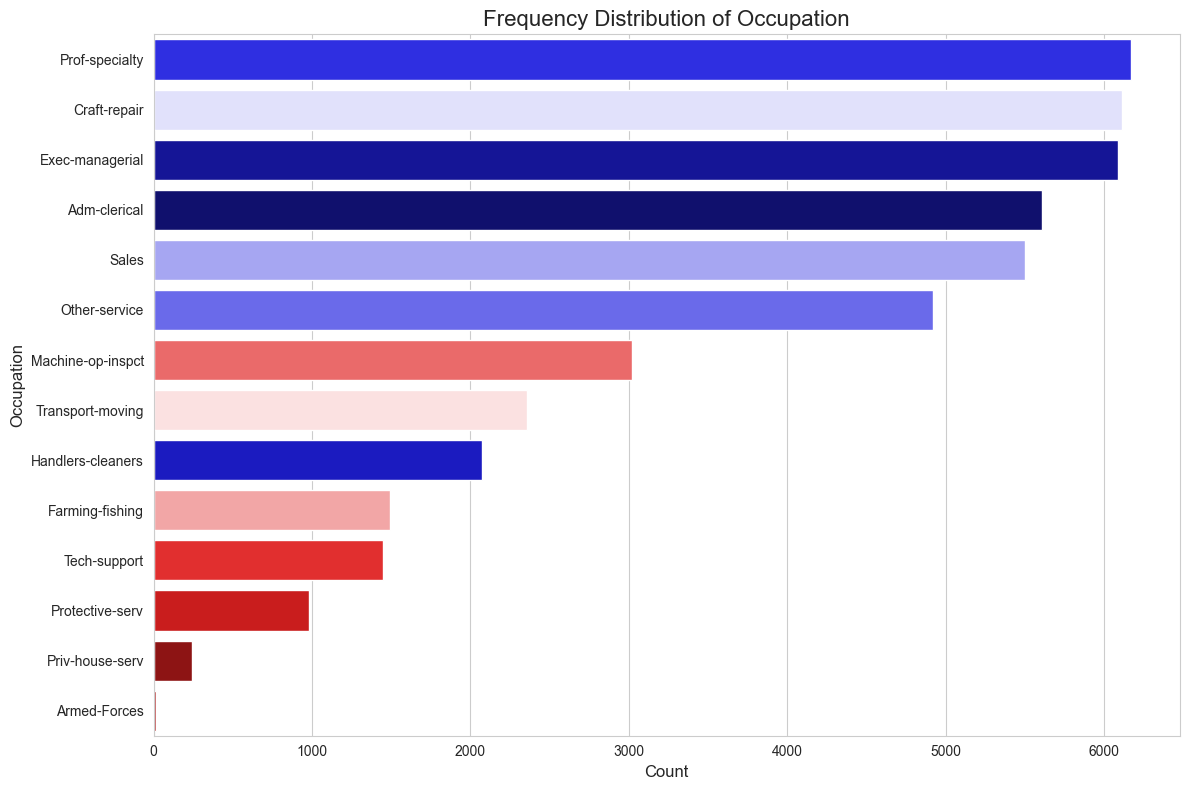

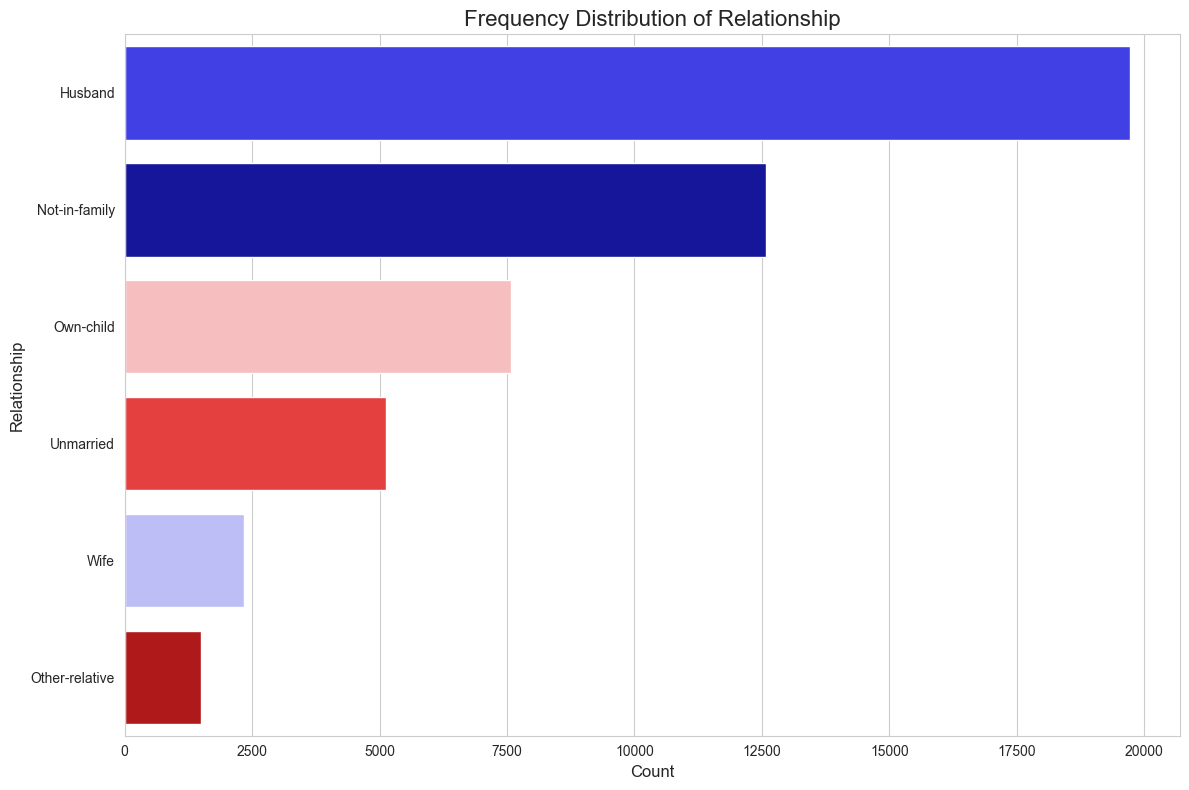

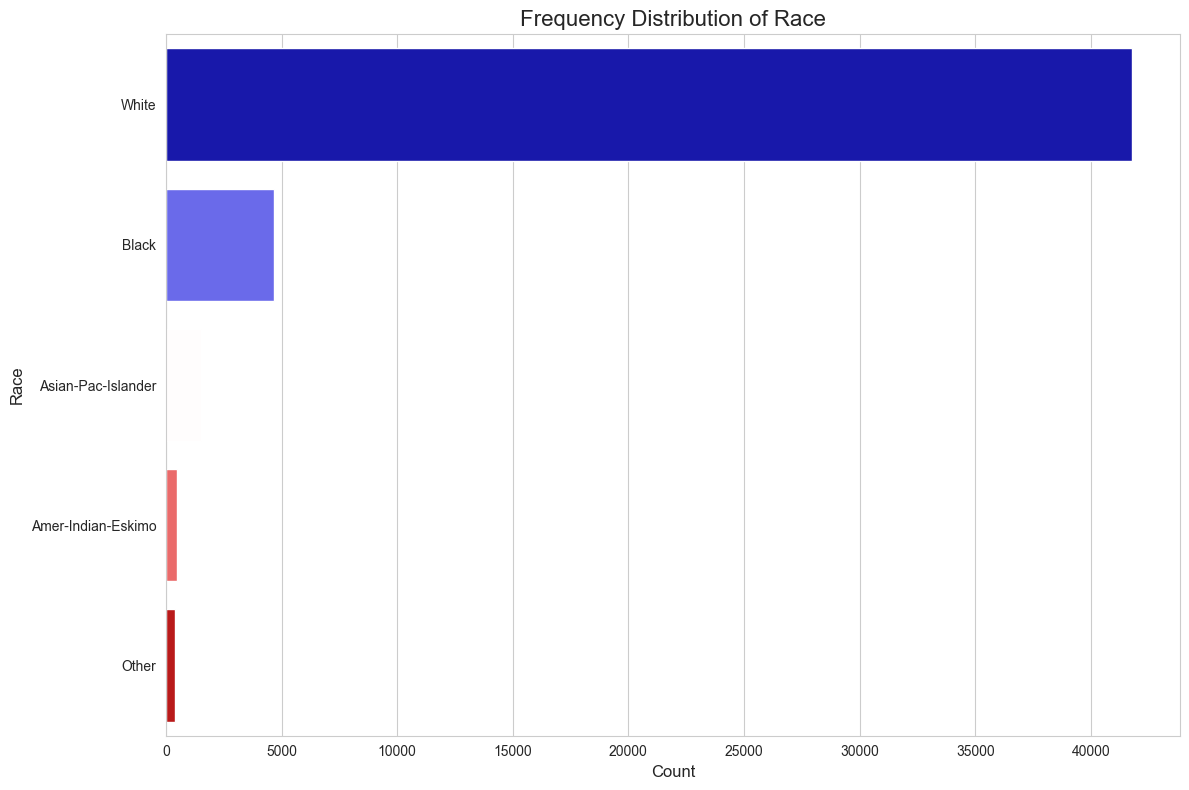

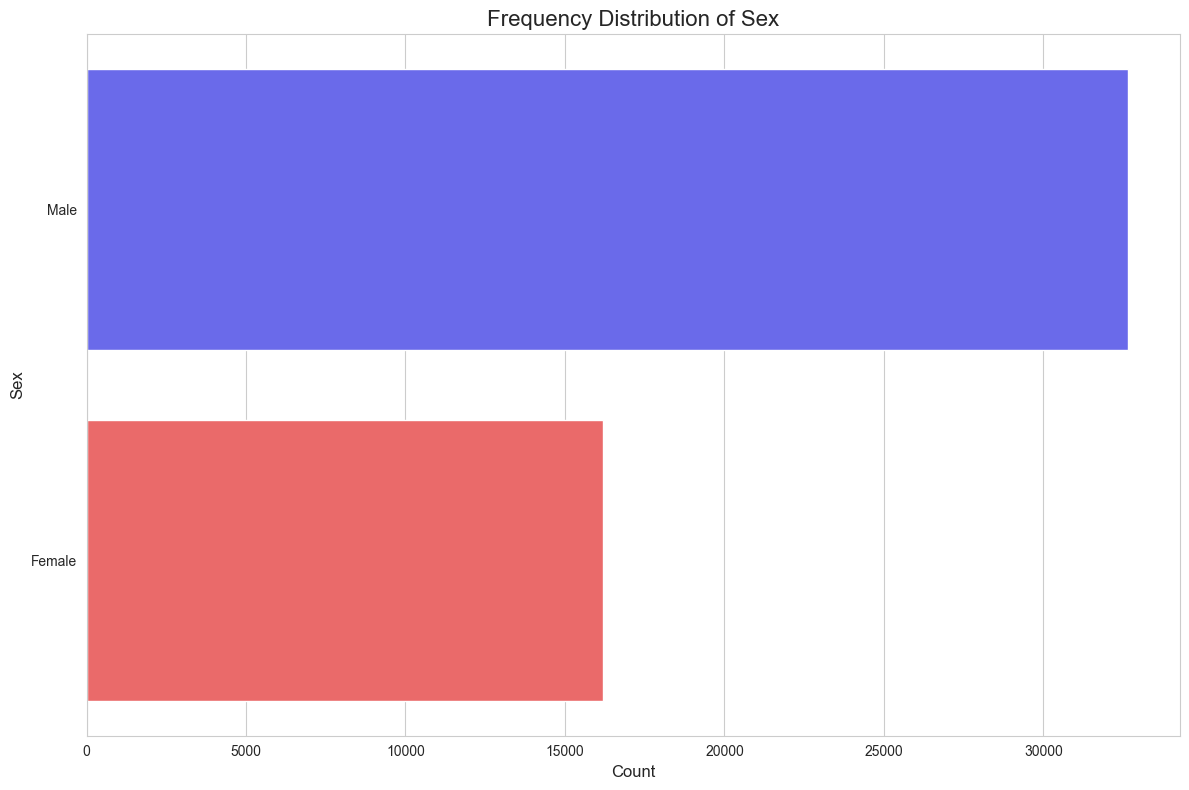

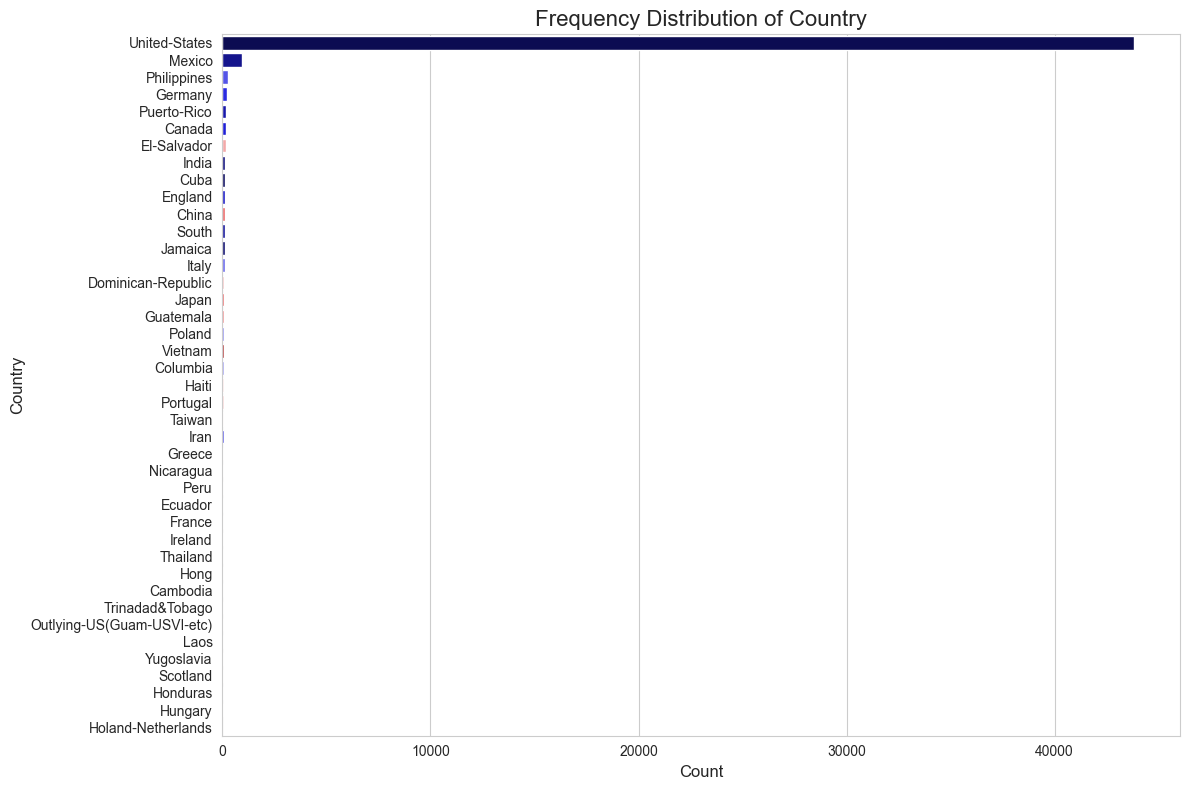

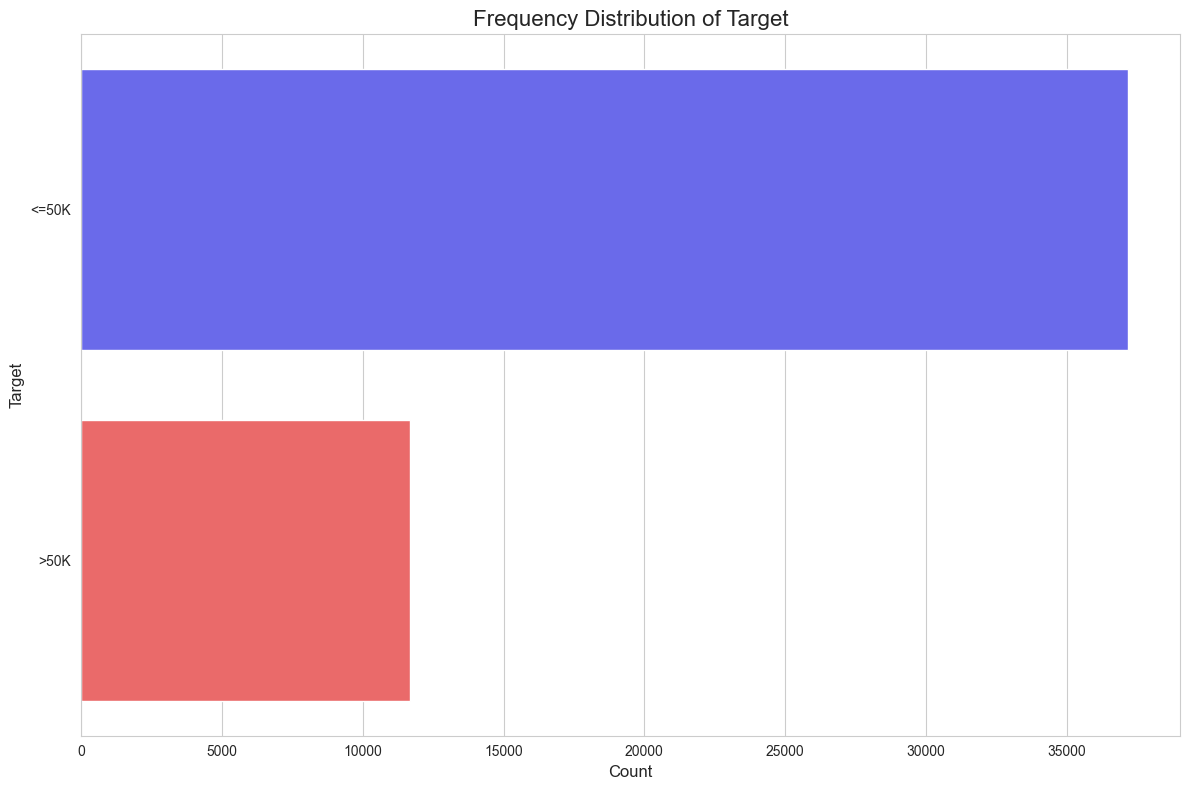


--- PART 2: BIVARIATE ANALYSIS (vs. Target) ---

Analyzing Numerical Features vs. Target...


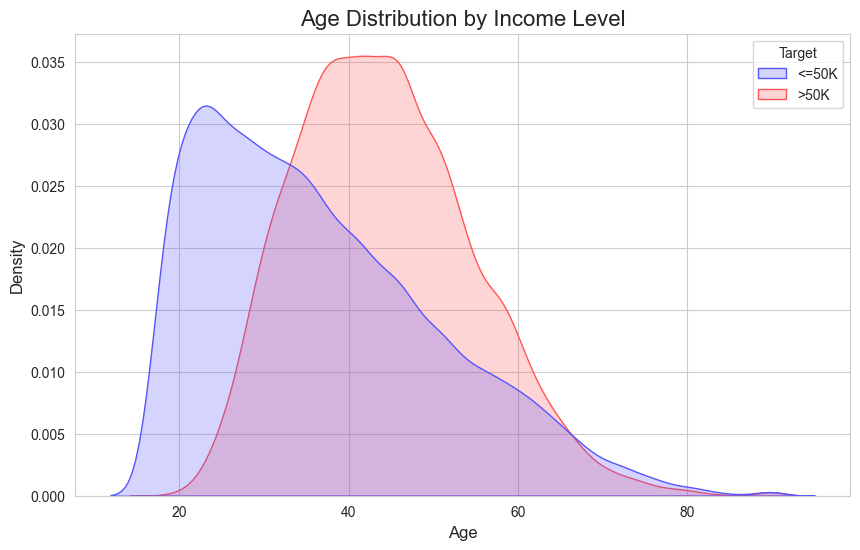

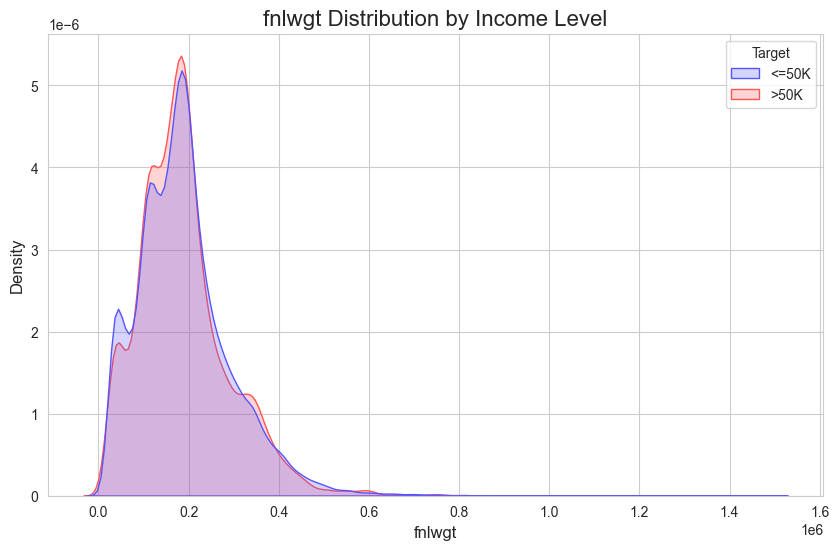

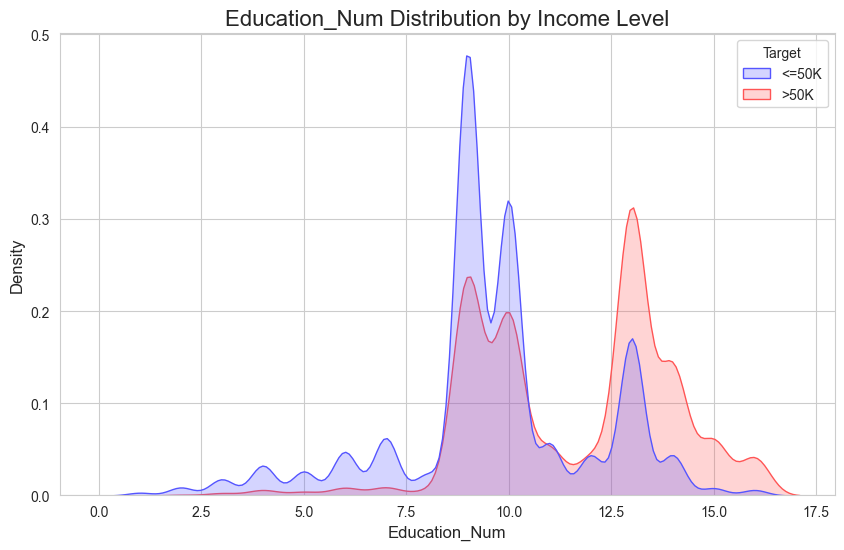

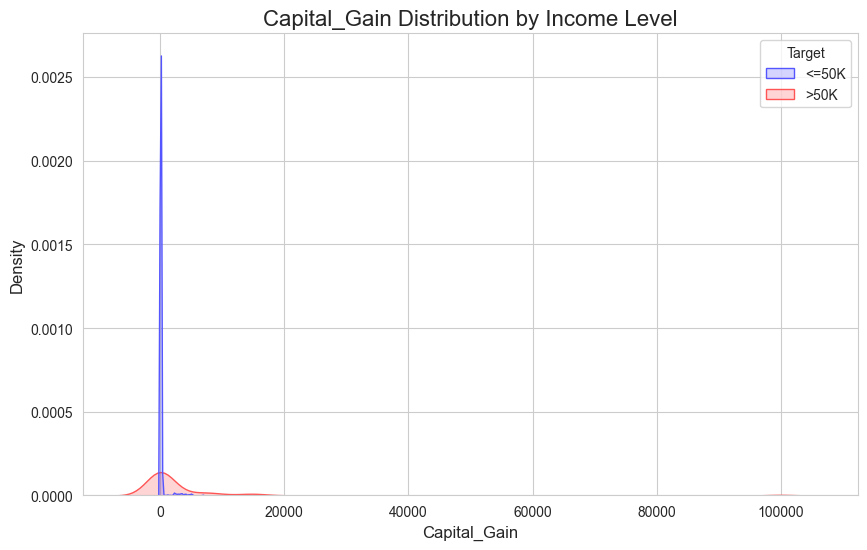

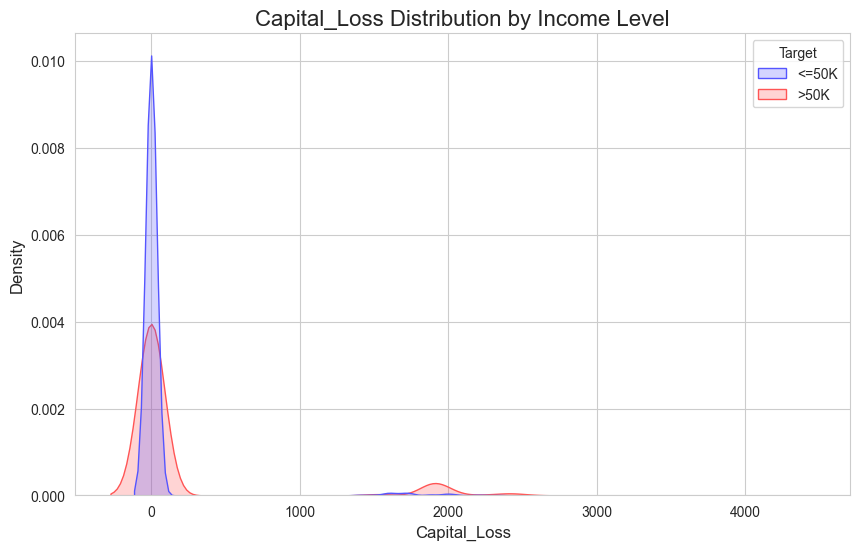

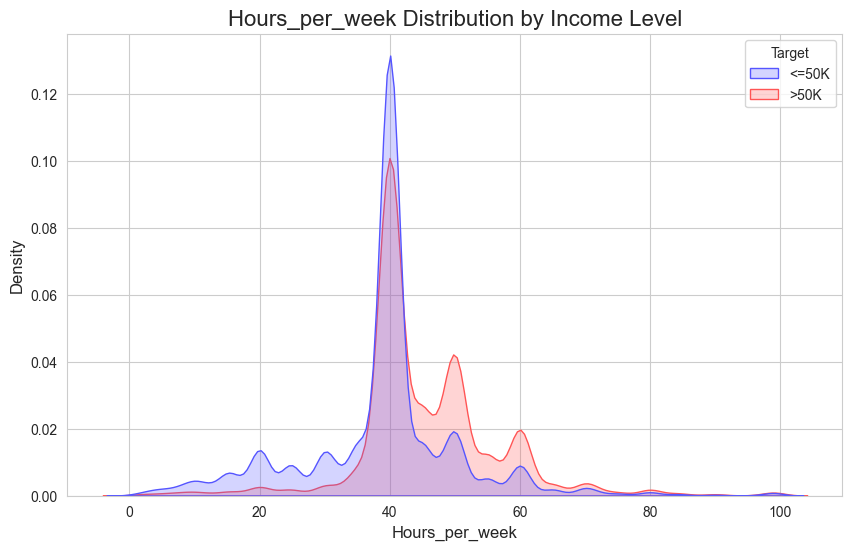


Analyzing Categorical Features vs. Target...


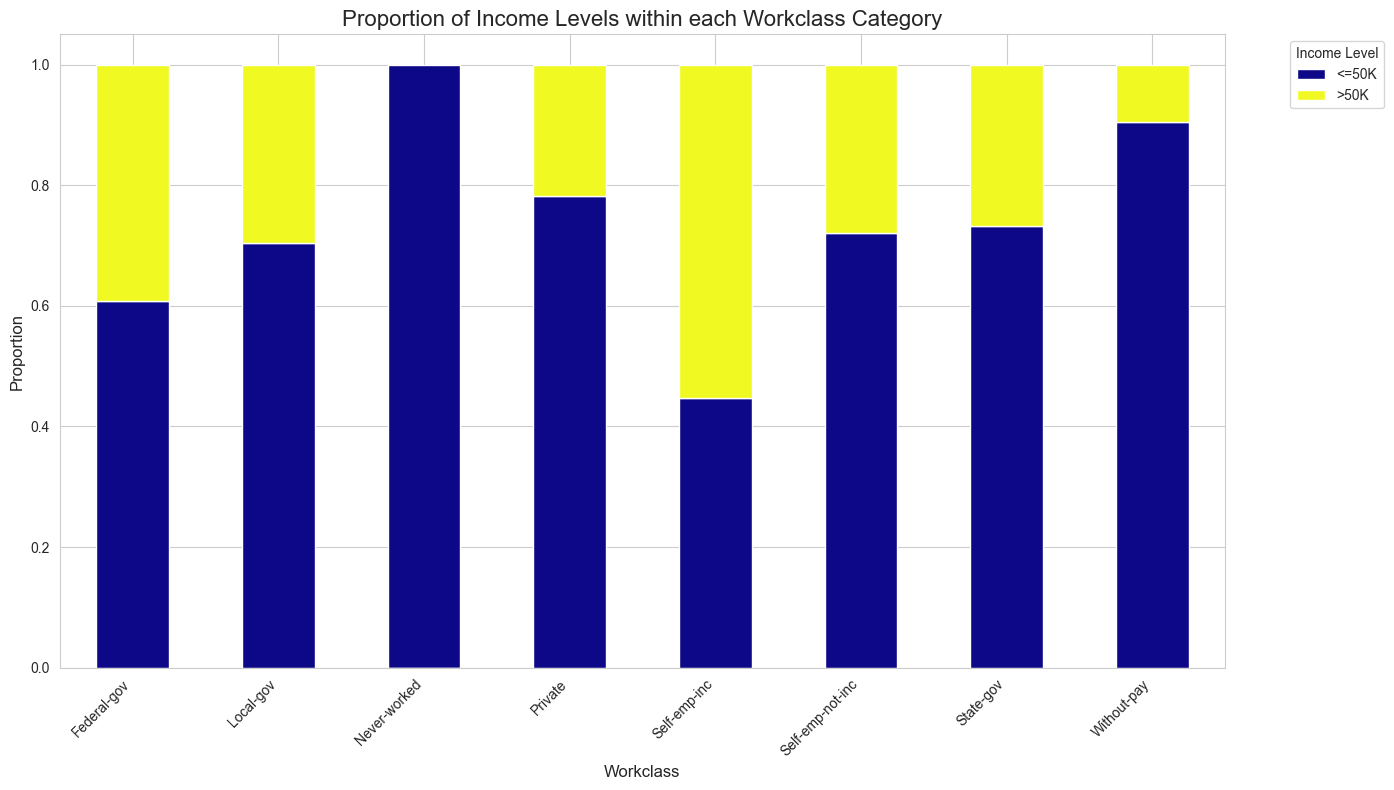

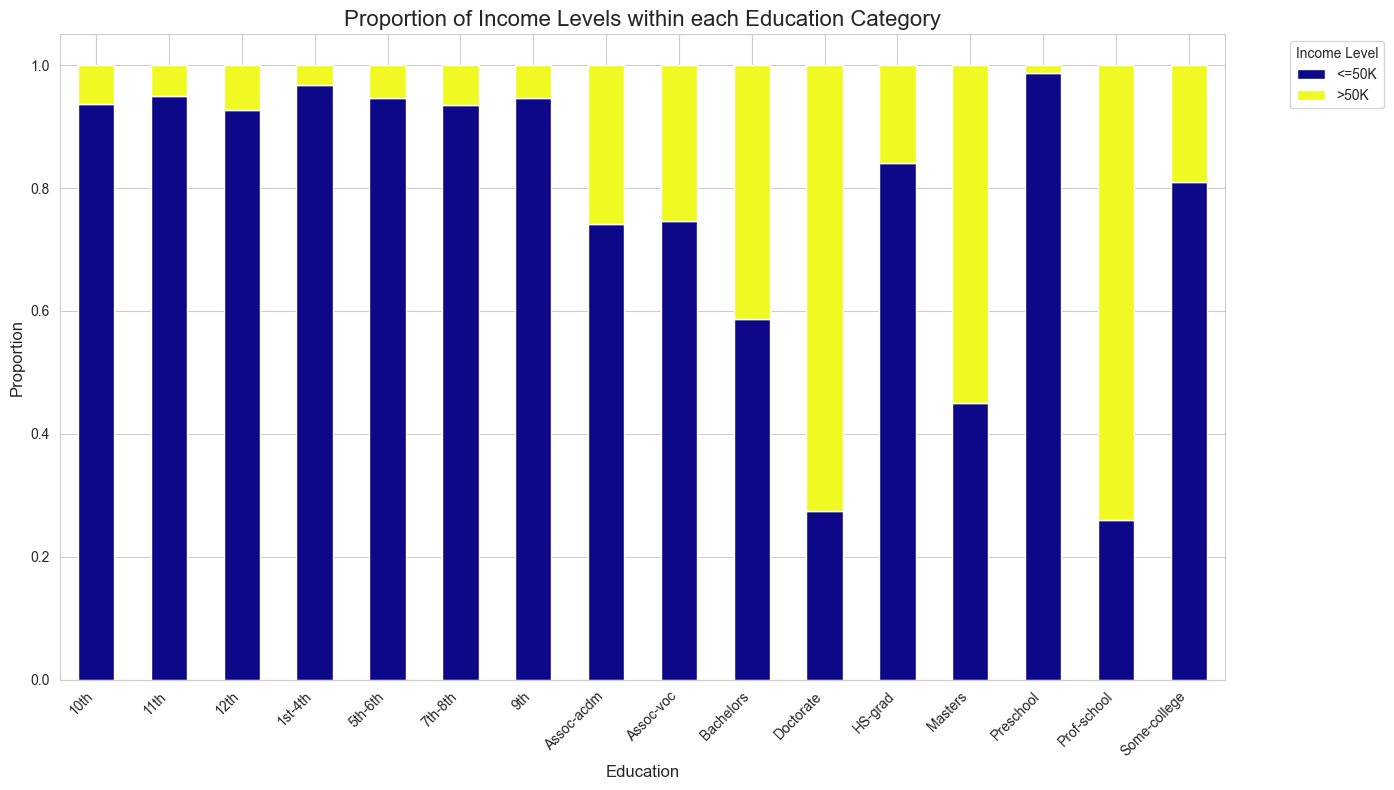

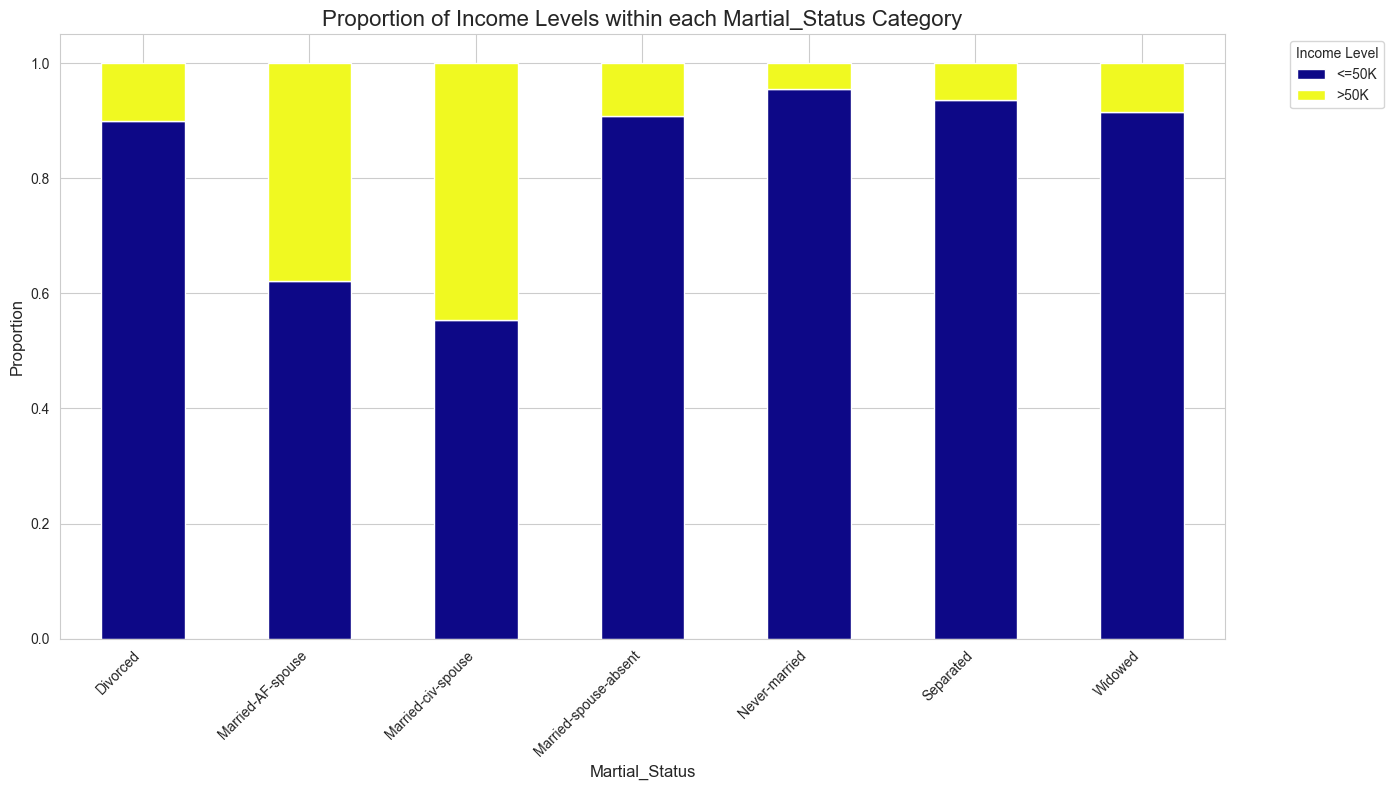

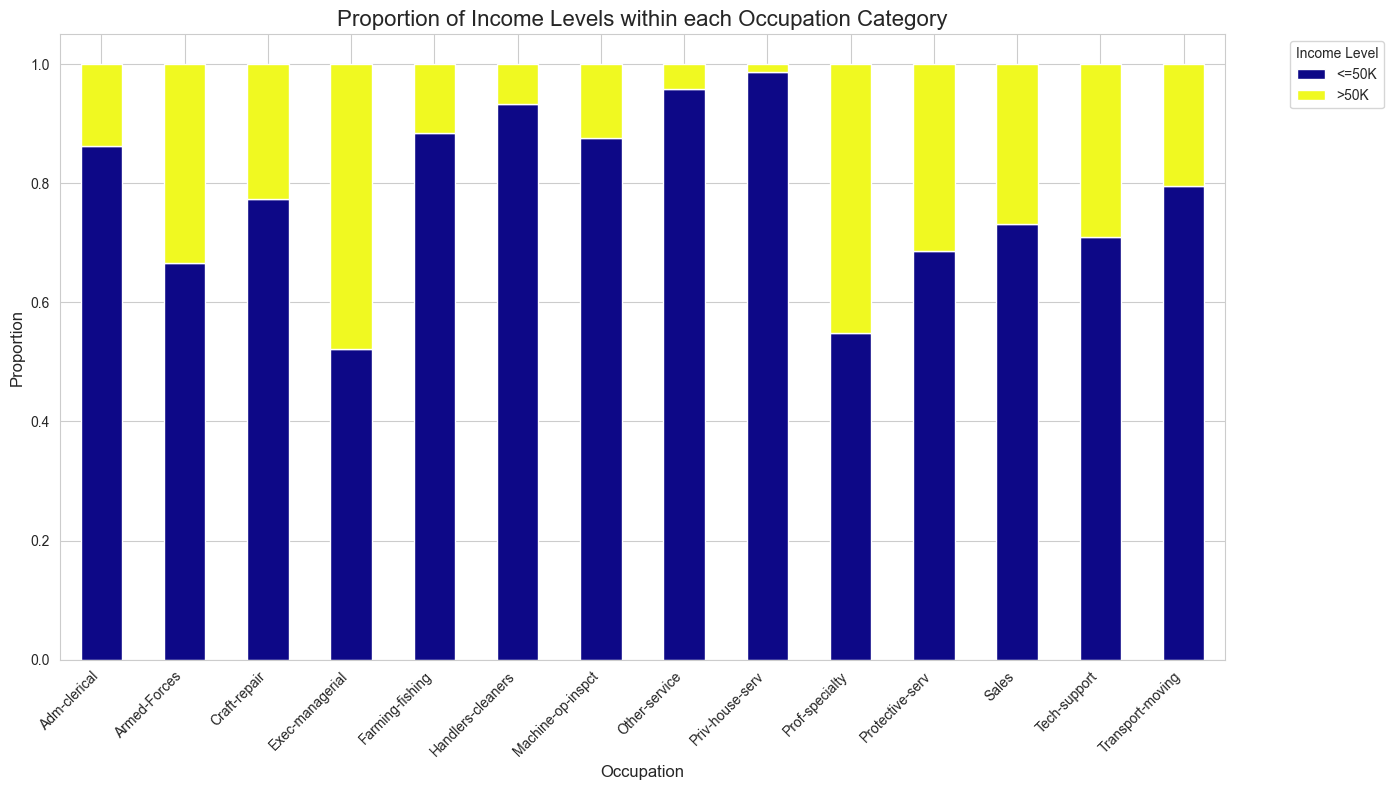

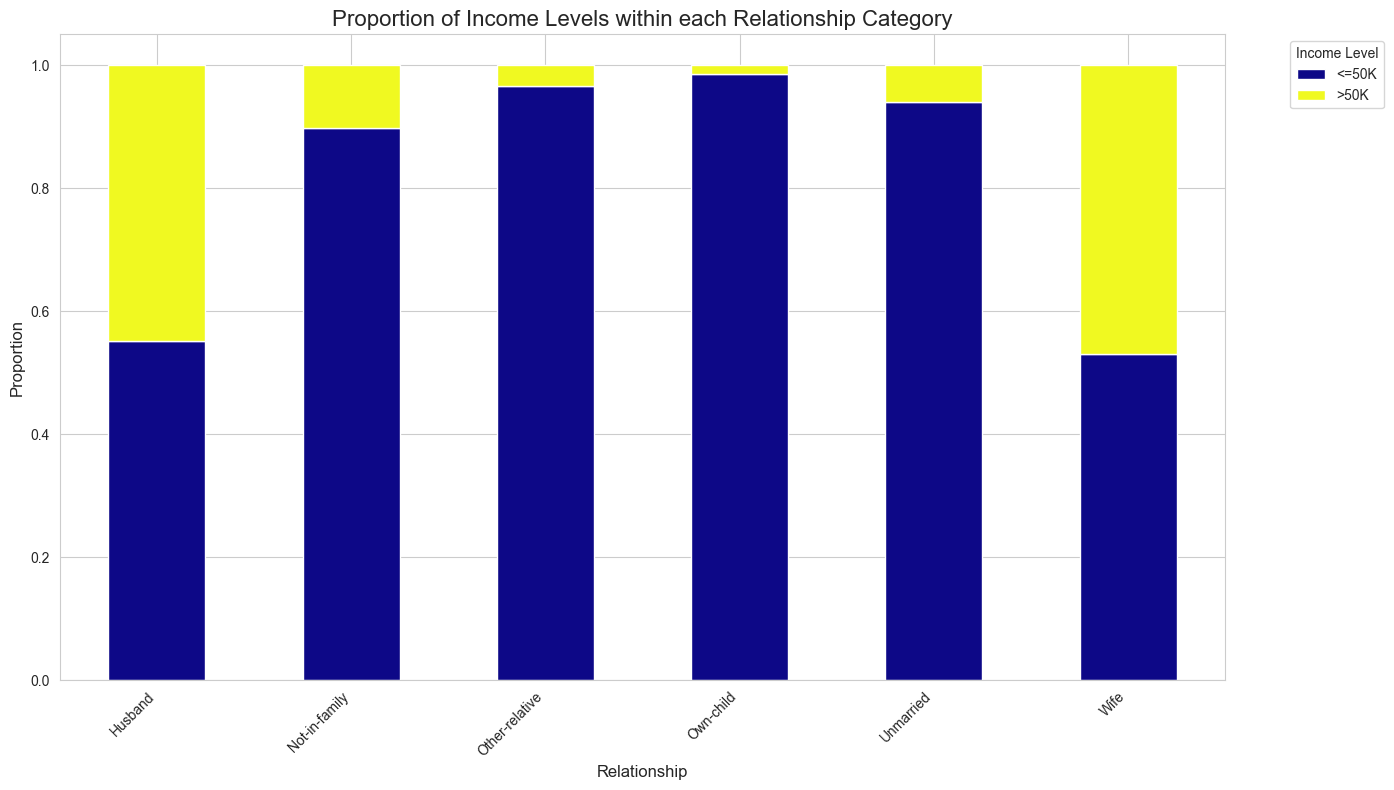

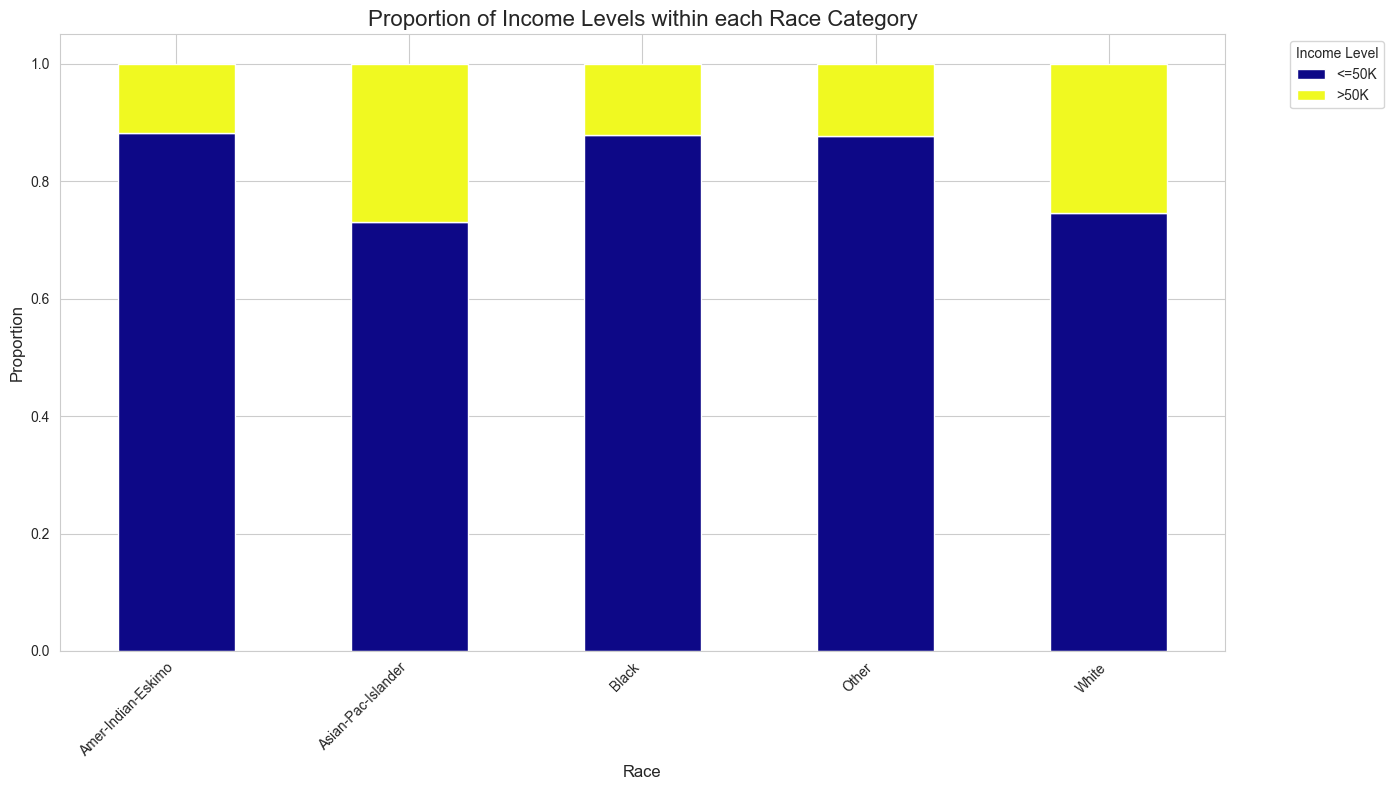

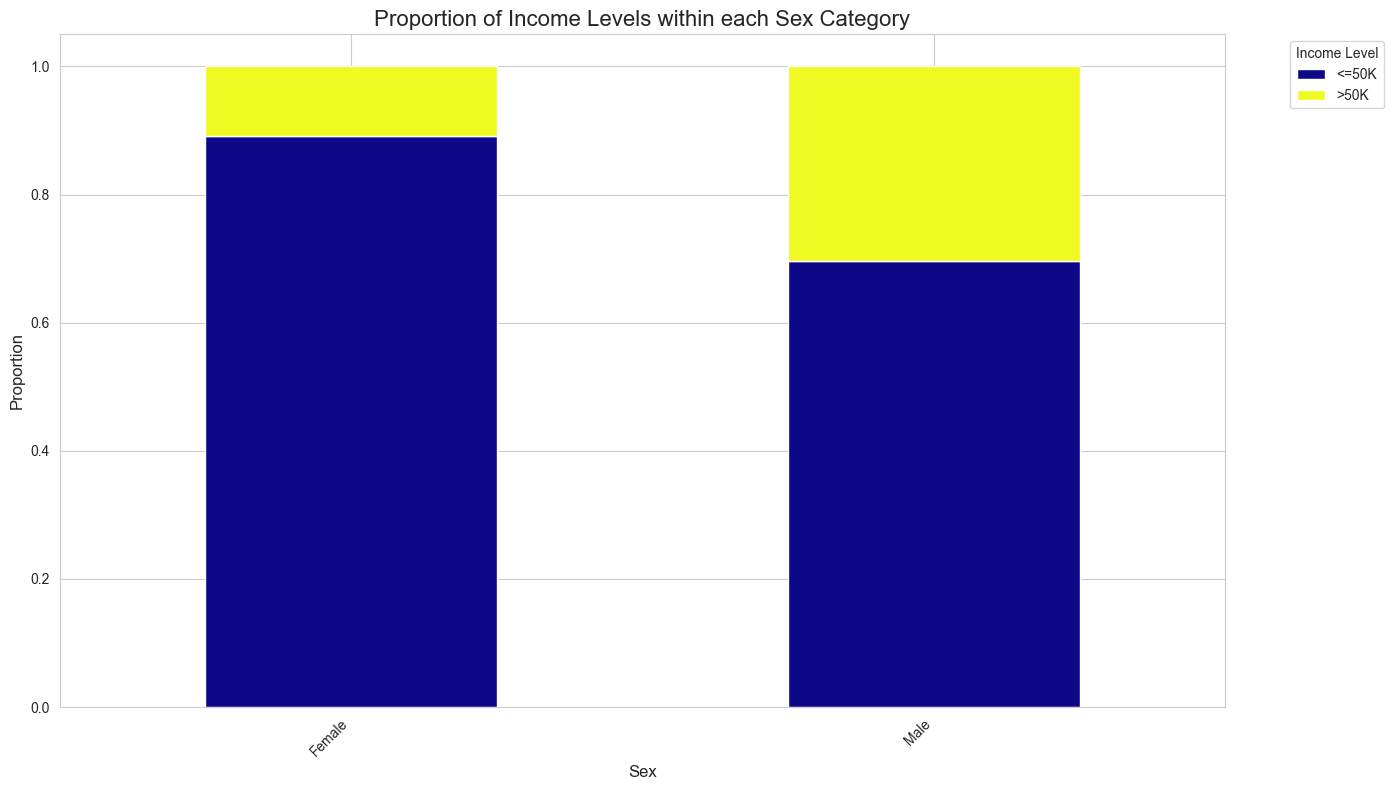

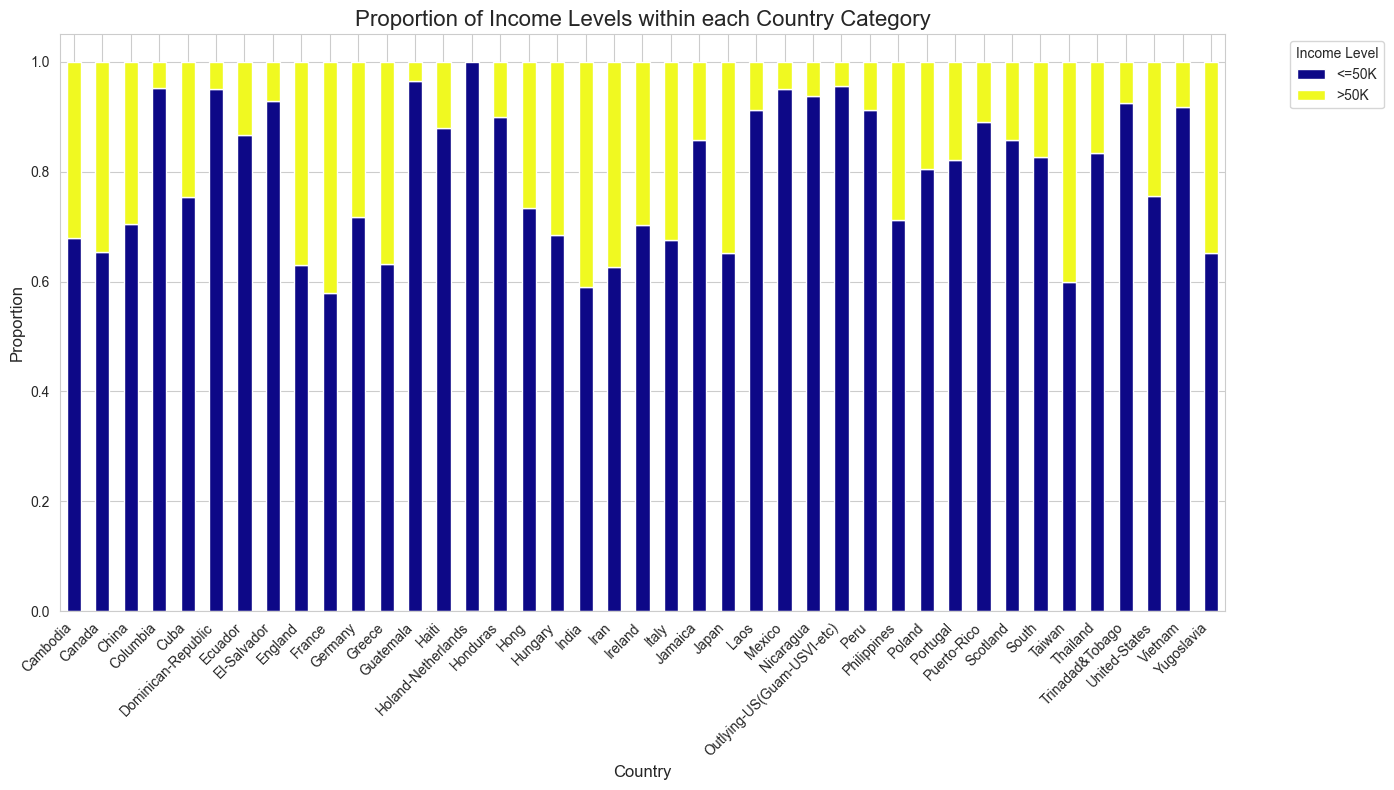


--- PART 3: MULTIVARIATE ANALYSIS ---

Analyzing Correlation Matrix of Numerical Features...


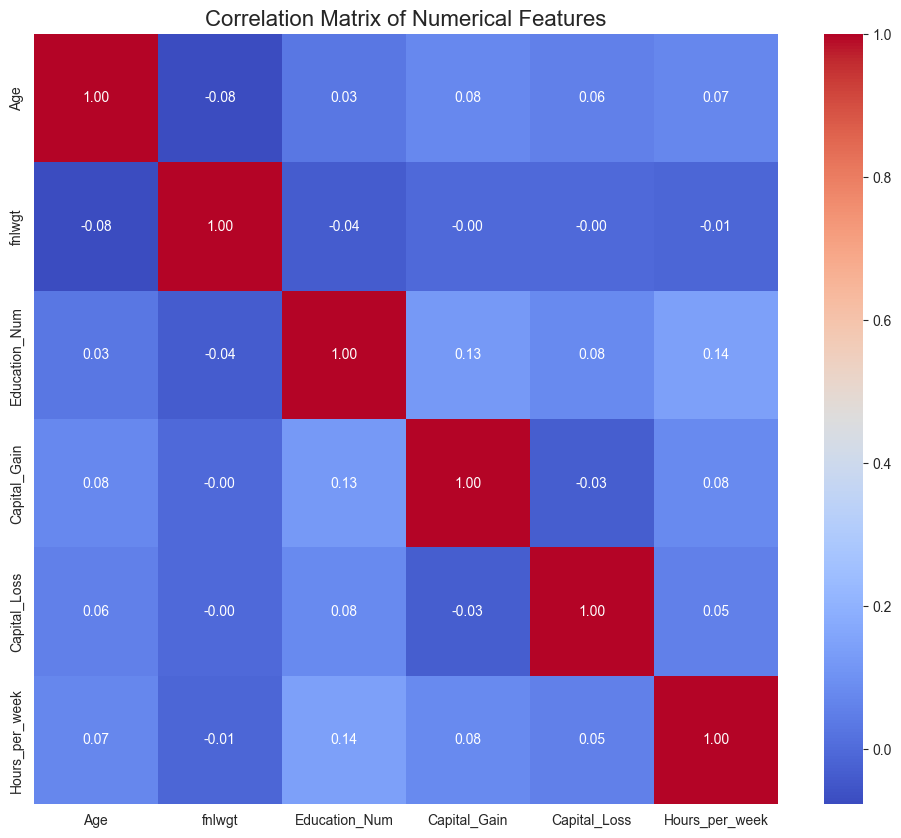


Generating Pair Plot for Key Features...


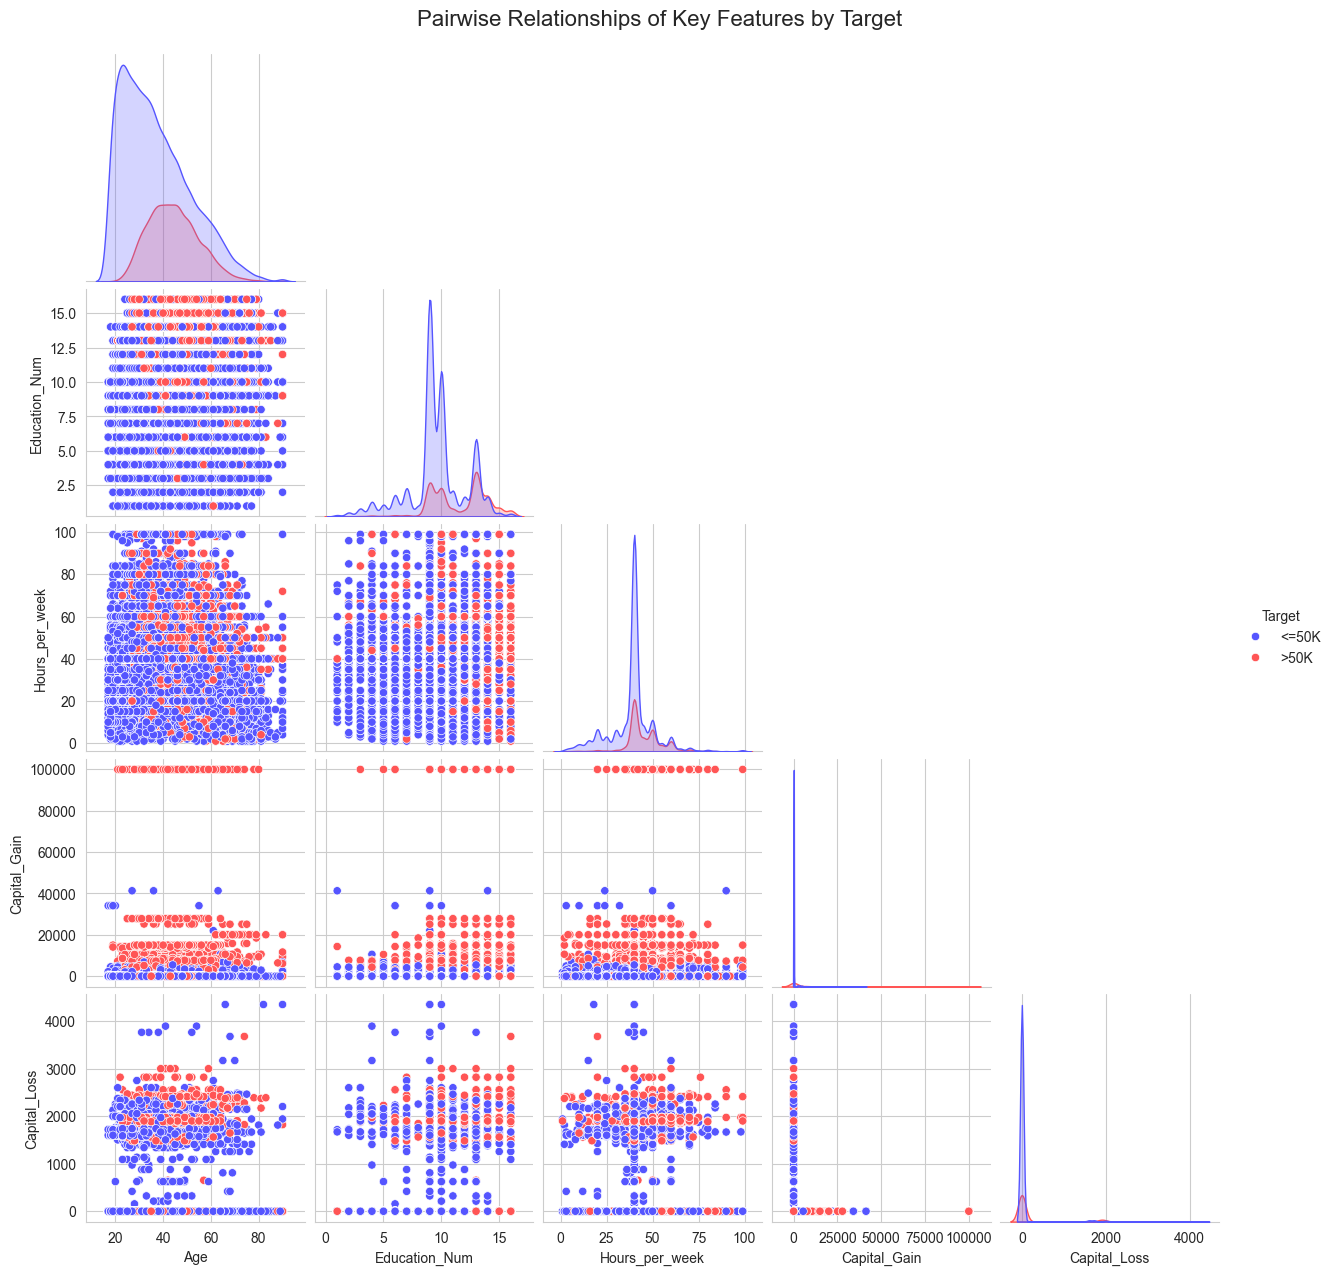

In [8]:
# --- Step 7: Structured Exploratory Data Analysis (EDA) ---

# Set plot style for better aesthetics
sns.set_style('whitegrid')
print("Starting Structured EDA...")

# Define numerical and categorical columns for easier access
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# ==============================================================================
# PART 1: UNIVARIATE ANALYSIS (Understanding Individual Features)
# ==============================================================================
print("\n--- PART 1: UNIVARIATE ANALYSIS ---")

# --- 1a. Numerical Feature Distributions ---
# Goal: Understand the distribution, central tendency, and spread of numerical data.
# Visualization: Histogram for distribution shape, Box Plot for outliers.
print("\nAnalyzing Numerical Feature Distributions...")
for col in numerical_cols:
    plt.figure(figsize=(14, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}', fontsize=14)
    
    plt.suptitle(f'Univariate Analysis of {col}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# --- 1b. Categorical Feature Distributions ---
# Goal: Understand the frequency of each category.
# Visualization: Count Plot (horizontal for readability).
print("\nAnalyzing Categorical Feature Distributions...")
for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='seismic', hue=col, legend=False)
    plt.title(f'Frequency Distribution of {col}', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()


# ==============================================================================
# PART 2: BIVARIATE ANALYSIS (Understanding Relationships with the Target)
# ==============================================================================
print("\n--- PART 2: BIVARIATE ANALYSIS (vs. Target) ---")

# --- 2a. Numerical Features vs. Target ---
# Goal: See if the distribution of numerical features differs for high/low income.
# Visualization: Kernel Density Estimate (KDE) plot.
print("\nAnalyzing Numerical Features vs. Target...")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=col, hue='Target', fill=True, common_norm=False, palette='seismic')
    plt.title(f'{col} Distribution by Income Level', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

# --- 2b. Categorical Features vs. Target ---
# Goal: See which categories have a higher proportion of high-income individuals.
# Visualization: 100% Stacked Bar Chart (Proportional).
print("\nAnalyzing Categorical Features vs. Target...")
for col in categorical_cols:
    if col == 'Target': continue
    
    prop_df = df.groupby(col)['Target'].value_counts(normalize=True).unstack().fillna(0)
    prop_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma')
    
    plt.title(f'Proportion of Income Levels within each {col} Category', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# ==============================================================================
# PART 3: MULTIVARIATE ANALYSIS (Exploring Complex Interactions)
# ==============================================================================
print("\n--- PART 3: MULTIVARIATE ANALYSIS ---")

# --- 3a. Correlation Matrix of Numerical Features ---
# Goal: Identify linear relationships between numerical variables.
# Visualization: Heatmap.
print("\nAnalyzing Correlation Matrix of Numerical Features...")
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# --- 3b. Pairwise Relationships Colored by Target ---
# Goal: Get a high-level overview of interactions and class separation.
# Visualization: Pair Plot. (Note: This can be computationally intensive)
print("\nGenerating Pair Plot for Key Features...")
# We select a subset of key features to keep the plot readable and fast.
key_features = ['Age', 'Education_Num', 'Hours_per_week', 'Capital_Gain', 'Capital_Loss', 'Target']
sns.pairplot(df[key_features], hue='Target', palette='seismic', corner=True)
plt.suptitle('Pairwise Relationships of Key Features by Target', y=1.02, fontsize=16)
plt.show()